- 데이터 수집 : 팀 전원
- 데이터 정제 : (한서희, 장희성/2명)
- 데이터 분석/검증 : (장희성, 강선영/2명)
- 머신러닝[계획, 정제] : (백혜린, 한서희/2명)
- 머신러닝[인코딩, 분리, 선택, 학습, 예측] : (김준성, 백혜린/2명)
- 데이터 시각화 : (강선영, 장희성/2명)
- ppt/ 발표 : 메인(강선영/1명) 서브(장희성/1명)

# 데이터 분석 기반 2025 국내 프로 스포츠 관중수 예측 및 스포츠 팬 맞춤 전략 제안

## 1. 프로젝트 개요

### 1.1 배경
- 최근 스포츠 관람은 단순한 취미를 넘어 개인의 라이프스타일과 정체성을 나타내는 주요 요소로 자리 잡음.  
  특히 Z세대를 중심으로 스포츠 경기장에 직접 방문해 관람하는 '직관코어' 트렌드가 부상하며, 이는 스포츠 산업의 새로운 기회를 창출하고 있음.  
- 수집된 데이터(2021~2024년 전국 4대 스포츠 종목[배구, 야구, 농구, 축구] 경기장 관중수 및 성별·연령대별 선호도 조사, 일별 네이버 검색량)를  
  활용하여 관중 동원 및 스포츠 선호 트렌드를 분석하는 것은 의미 있는 과제가 될 것으로 판단됨.  
- 이를 통해 연령대와 성별에 따른 스포츠 소비 특성을 파악하고, Z세대를 포함한 연령별 차별화된 마케팅 전략을 수립할 수 있을 것으로 기대됨.

---

### 1.2 목적
- **2021~2024년 관중수 데이터, 스포츠 직관 선호도 및 네이버 검색량 데이터**를 분석하여,  
  **2025년 스포츠리그 관중수 예측 및 연령·성별·지역 특성을 반영한 맞춤형 마케팅 전략 제안**.

---

### 1.3 가설
- **가설 1**: Z세대 성별간 종목별 선호도 차이가 있다.
- **가설 2**: 연령대별 성별에 따라 스포츠 선호도에 차이가 있다.
- **가설 3**: 지역에 따라 관중수와 선호하는 종목 간에는 유의미한 상관관계가 존재한다

## 2. 데이터 수집

### 2-1. 오픈 데이터 다운로드

- 출처: 문화 빅데이터 플랫폼  
  - **연령대별 스포츠 경기 관람 종목 선호도 조사** (2021년 11월 ~ 2024년 11월)  
    [바로가기](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=7180de30-eb98-11ec-a6e8-cdf27550dc0d)  

- 출처: 프로스포츠 정보광장  
  - **프로스포츠 관람객 성향조사** (2021년 11월 ~ 2024년 11월)  
    [바로가기](http://data.prosports.or.kr/page/board/tendency)  

- 출처: 네이버 데이터랩  
  - **야구/축구/농구/배구 월간 검색어량** (2021년 ~ 2024년)  
    [바로가기](https://datalab.naver.com/keyword/trendSearch.naver)  

- 2-2. 웹크롤링을 통한 데이터 수집

- 출처: 프로스포츠 정보광장  
  - **각 종목 경기장 주소**  
    [바로가기](http://data.prosports.or.kr/page/statistic/stadium)  

  - **각 종목 관중수**  
    [바로가기](http://data.prosports.or.kr/page/schedule/schedule)  


## 3. 데이터 전처리

### 사용할 모듈 한번에 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from sklearn.preprocessing import LabelEncoder
from scipy.stats import t
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap

### 3.1.1.데이터 병합 (선호도 조사 데이터)
    - 월별로 분산되 선호도 조사 데이터(37개)를 하나의 데이터셋으로 병합 후 분석에 불필요한 열(소득수준, 응답 아이디) 제거

In [ ]:
# # 문화 빅데이터 플렛폼에서 받아온 데이터로드하기

# b1 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202111.csv') # 21년 11월
# b2 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202112.csv')# 21년 12월
# b3 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202201.csv')# 22년 1월
# b4 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202202.csv')# 22년 2월
# b5 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202203.csv')# 22년 3월
# b6 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202204.csv')# 22년 4월
# b7 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202205.csv')# 22년 5월
# b8 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202206.csv')# 22년 6월
# b9 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202207.csv')# 22년 7월
# b10 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202208.csv')# 22년 8월
# b11 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202209.csv')# 22년 9월
# b12 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202210.csv')# 22년 10월
# b13 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202211.csv')# 22년 11월
# b14 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202212.csv')# 22년 12월
# b15 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202301.csv')# 23년 1월
# b16 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202302.csv')# 23년 2월
# b17 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202303.csv')# 23년 3월
# b18 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202304.csv')# 23년 4월
# b19 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202305.csv')# 23년 5월
# b20 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202306.csv')# 23년 6월
# b21 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202307.csv')# 23년 7월
# b22 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202308.csv')# 23년 8월
# b23 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202309.csv')# 23년 9월
# b24 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202310.csv')# 23년 10월
# b25 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202311.csv')# 21년 11월
# b26 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202312.csv') # 23년 12월
# a1 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202401.csv') # 24년 1월
# a2 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202402.csv') # 24년 2월
# a3 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202403.csv') # 24년 3월
# a4 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202404.csv') # 24년 4월
# a5 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202405.csv') # 24년 5월
# a6 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202406.csv') # 24년 6월
# a7 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202407.csv') # 24년 7월
# a8 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202408.csv') # 24년 8월
# a9 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202409.csv') # 24년 9월
# a10 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202410.csv') # 24년 10월
# a11 = pd.read_csv('CI_SPORTS_MATCH_VIEWNG_ITEM_INFO_202411.csv') # 24년 11월

# all_month = pd.concat([b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,b24,b25,b26,a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11])
# all_month.reset_index(drop=True, inplace=True)
# all_month.to_csv('21년부터24년전체선호도.csv', index=False, encoding='cp949')

#### 변수 생성

| 변수명                | 설명                                                                                         |
|-----------------------|----------------------------------------------------------------------------------------------|
| **all_month**         | - 2021년부터 2023년까지의 전체 선호도를 포함하는 변수<br> - 70세 이상 제거<br> - '세종특별자치시' 제거 |
| **condition1/2/3**    | 1/2/3순위에 야구, 축구, 배구, 농구가 아닌 다른 종목일 경우 '없음'으로 변경                     |
| **pivoted_data**      | - 1순위에 3점, 2순위에 2점, 3순위에 1점을 가중치로 부여하여 종목별 점수 생성                   |
| **prefer**            | - 2021년부터 2023년까지의 순위 데이터(가중치 전)에서 1/2/3순위가 모두 '없음'인 데이터를 제거    |
| **pivoted_data_prefer** | - 1순위에 3점, 2순위에 2점, 3순위에 1점을 가중치로 부여하여 종목별 점수 생성 (prefer 데이터 기반) |

In [ ]:
#  열 이름 변경
# 제공된 새로운 열 이름으로 기존 열 이름을 변경합니다.
all_month = all_month.rename(columns={
    'EXAMIN_YM': '조사연도',        # 조사 연도
    'SEXDSTN_FLAG_CD': '성별코드',  # 성별 코드
    'AGRDE_FLAG_NM': '연령대',      # 연령대
    'ANSWRR_OC_AREA_NM': '지역',    # 지역 이름
    'HSHLD_INCOME_DGREE_NM': '가구소득',  # 가구 소득 수준
    'SPORTS_VIEWNG_ITEM_RN1_VALUE': '1순위스포츠',  # 1순위 스포츠
    'SPORTS_VIEWNG_ITEM_RN2_VALUE': '2순위스포츠',  # 2순위 스포츠
    'SPORTS_VIEWNG_ITEM_RN3_VALUE': '3순위스포츠'   # 3순위 스포츠
})

# 가구소득 열삭제 - 가구소득은 필요가 없다고 판단
# RESPOND_ID	 열삭제 - RESPOND_ID	은 필요가 없다고 판단
all_month.drop('가구소득', axis=1, inplace=True)
all_month.drop('RESPOND_ID', axis=1, inplace=True)
all_month

#  데이터 확인
# 변경된 데이터 프레임의 첫 몇 줄을 확인합니다.
all_month.head()

# 필요하면 CSV 파일로 저장할 수 있습니다.
# all_month.to_csv('선호도 21년부터 24년.csv', index=False, encoding='utf-8-sig')

- '년도'와 '월' 열을 생성하여 날짜 데이터를 분리 (시간 기반 분석을 위한 처리)
- 필요한 열만 따로 저장
- 70대 이상 데이터의 누락이 많아 70대 미만만 분석.  
- 세종특별자치시는 관중수 데이터가 없어서 삭제.  

In [ ]:
all_month['조사연도'] = pd.to_datetime(all_month['조사연도'], format='%Y%m')
all_month['월'] = all_month['조사연도'].dt.month
all_month['년도'] = all_month['조사연도'].dt.year

# 데이터 프레임 재생
all_month= all_month[['년도','월','성별코드','연령대','지역','1순위스포츠','2순위스포츠','3순위스포츠']]

# 70대이상과 세종특별자치시 데이터 삭제 처리
all_month = all_month[all_month['연령대'] != '70대 이상']
all_month = all_month[all_month['지역'] != '세종특별자치시']

- '순위' 열에서 "야구", "축구", "배구", "농구" 외의 값은 모두 "없음"으로 처리하여 분석 대상에 초점 맞춤.

In [ ]:
# '1순위' 열에서 "야구", "축구", "배구", "농구"가 아닌 값을 "없음"으로 변경
condition1 = ~all_month['1순위스포츠'].isin(['야구', '축구', '배구', '농구'])
all_month.loc[condition1, '1순위스포츠'] = '없음'
# '2순위' 열
condition2 = ~all_month['2순위스포츠'].isin(['야구', '축구', '배구', '농구'])
all_month.loc[condition2, '2순위스포츠'] = '없음'
# '3순위' 열
condition3 = ~all_month['3순위스포츠'].isin(['야구', '축구', '배구', '농구'])
all_month.loc[condition3, '3순위스포츠'] = '없음'

all_month

### 3.2 결측치 처리
#### 3.2.1 선호도 1, 2, 3순위 전체 응답이 '없음'인 데이터 제거

- **정제 기준**: 1, 2, 3순위 응답이 모두 '없음'으로 기록된 데이터  
- **정제 이유**: 1, 2, 3순위 모두 응답이 없는 데이터는 분석에 필요한 유효한 정보를 포함하지 않으므로 제거가 필요함.  
  - 분석의 정확성을 높이고, 노이즈 데이터를 줄이기 위함.
<br>
- 연령대를 정수로 변환


In [ ]:
# 확인하기
all_month = all_month[~(all_month['1순위스포츠'] == '없음')&(all_month['2순위스포츠'] == '없음') & (all_month['3순위스포츠'] == '없음')]

# '연령' 열의 모든 값에서 '대'제거
all_month['연령대'] = all_month['연령대'].str.replace('대', '')
all_month['연령대'] = all_month['연령대'].astype(int)
all_month.info()

#### 데이터 1차 정제 결과

- **초기 데이터 개수**: 84,840행  
  - 최초 데이터 병합 후 전체 데이터의 행 수  
- **1, 2, 3순위 전체 '없음' 데이터**: 53,704행  
  - 1, 2, 3순위 모두 '없음'으로 표시된 데이터를 제거  
- **최종 데이터 개수**: 30,126행  
  - 필요없는 열 및 '없음' 데이터를 삭제한 후 남은 데이터의 행 수  
    - 응답하지 않은 데이터(1, 2, 3순위 모두 '없음')의 비율이 높아, 조사 대상 중 응답을 하지 않은 사람의 수가 많았던 것으로 판단됨.  
    - 데이터 정제 과정을 통해 유효한 데이터만 추출하여 분석의 신뢰성을 확보함.

In [ ]:
# 가중치 부여하기 전 데이터 저장하기
all_month.to_csv('선호도 21년부터 24년_순위(가중치전).csv', index=False, encoding='cp949')

## 경기장 및 관중수 데이터

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 종목별 장소 관중수 데이터 로드
address = pd.read_csv('종목별_장소_관중수_최종.csv')
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5272 entries, 0 to 5271
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      5272 non-null   object
 1   시간      5272 non-null   object
 2   단체/구단   5272 non-null   object
 3   경기      5272 non-null   object
 4   장소      5272 non-null   object
 5   결과      5272 non-null   object
 6   날씨      5238 non-null   object
 7   관중수     5272 non-null   object
dtypes: object(8)
memory usage: 329.6+ KB


#### 3.2.2 WKBL(여자농구) 데이터 제외

- **처리 내용**: WKBL(여자농구) 데이터를 분석에서 제외.  
- **처리 이유**: 프로스포츠 정보광장에서 크롤링한 데이터에 여자농구 관중수 정보가 없음.  
  - 선호도 데이터에도 여자농구 항목이 포함되지 않아 분석 대상에서 제외.

In [ ]:
address = address[~(address['단체/구단'] == 'WKBL')]

### 경기장 데이터와 관중수 데이터 병합

In [ ]:
# 경기장 데이터 로드하기
wheres = pd.read_csv('경기장 .csv') # 경기장 위치

- 잘못된 경기장 정보 정제 : 잘못 기재된 경기장 명과 주소, 누락된 값을 삭제하여 데이터 정제.  


In [ ]:
address[address['장소'] == '하나원큐청라체육관']
wheres[wheres['주소'].isna()]
wheres.dropna(subset=['주소'], inplace=True)
wheres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목      70 non-null     object
 1   경기장명    70 non-null     object
 2   주소      70 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


- 경기장 정보 병합 : 경기장명을 기준으로 해당 주소 데이터를 병합.  


In [ ]:
# 경기장명과 주소를 매핑 테이블로 생성
location_mapping = wheres.set_index('경기장명')['주소']

# address 데이터프레임에 '주소' 열 추가
address['주소'] = address['장소'].map(location_mapping)

# 결과 확인
address.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5052 entries, 0 to 5271
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      5052 non-null   object
 1   시간      5052 non-null   object
 2   단체/구단   5052 non-null   object
 3   경기      5052 non-null   object
 4   장소      5052 non-null   object
 5   결과      5052 non-null   object
 6   날씨      5018 non-null   object
 7   관중수     5052 non-null   object
 8   주소      5008 non-null   object
dtypes: object(9)
memory usage: 394.7+ KB


- 날씨가 누락인 데이터 보완

In [ ]:
# 누락된 날씨 데이터 보완 : 누락된 날씨 데이터를 수작업으로 확인하여 보완.

address[address['날씨'].isna()]

# 주어진 weather 데이터프레임
weather = pd.DataFrame({
    '날짜': ['2022/03/26', '2022/03/27', '2022/04/09', '2022/04/10', '2022/04/11', '2022/04/16',
           '2022/04/17', '2022/04/18', '2022/04/23', '2022/04/24', '2023/08/31', '2024/09/06'],
    '날씨': ['바람', '맑음', '비', '맑음', '맑음', '맑음', '흐림', '맑음', '흐림', '흐림', '흐림', '비']
})
# Step 1: '날짜' 기준으로 병합
address = pd.merge(
    address,          # 기존 데이터
    weather,          # 날씨 데이터
    how='left',       # 결측치 채우기 위해 left join 사용
    on='날짜'         # '날짜'를 기준으로 병합
)

# Step 2: 기존 '날씨' 결측치를 weather 데이터로 채우기
address['날씨'] = address['날씨_x'].fillna(address['날씨_y'])

# Step 3: 병합 과정에서 생긴 불필요한 컬럼 제거
address = address.drop(columns=['날씨_x', '날씨_y'])
address

,날짜,시간,단체/구단,경기,장소,결과,관중수,주소,날씨
0,2021/11/03,19:00,K리그,포항 VS 강원 FC,포항스틸야드,4 : 0,"1,001","경상북도 포항시 남구 동해안로6213번길 20, 포항스틸야드",맑음
1,2021/11/03,19:00,K리그,대전 하나 시티즌 VS 전남,대전 한화생명 이글스파크,0 : 0,"1,982",대전광역시 중구 대종로 373,구름조금
2,2021/11/03,19:00,K리그,광주 FC VS FC 서울,광주축구전용구장,3 : 4,932,"광주광역시 서구 금화로 240, 광주축구전용구장",구름조금
3,2021/11/03,19:30,K리그,성남 FC VS 인천 Utd,탄천종합운동장,1 : 1,"1,288","경기도 성남시 분당구 탄천로 215, 탄천종합운동장",비
4,2021/11/06,14:00,K리그,제주 Utd VS 수원 삼성,제주월드컵경기장,2 : 0,"1,633","제주특별자치도 서귀포시 월드컵로 33, 제주월드컵경기장",구름많음
...,...,...,...,...,...,...,...,...,...
5047,2024/11/30,14:00,KBL,수원KT VS 울산현대모비스,수원KT소닉붐아레나,73 : 85,"2,779",대한민국 경기도 수원시 권선구 서수원로577번길 171,비
5048,2024/11/30,14:00,KBL,고양 소노 VS 창원LG,고양체육관,78 : 86,"3,056","경기도 고양시 일산서구 중앙로 1601, 고양체육관",비
5049,2024/11/30,16:00,KBL,서울삼성 VS 원주DB,잠실실내체육관,66 : 76,"2,617","서울특별시 송파구 올림픽로 25, 잠실실내체육관",비
5050,2024/11/30,16:00,KOVO,IBK기업은행 VS \t정관장,화성종합실내체육관,0 : 3,"2,603","경기도 화성시 향남읍 향남로 470, 화성실내체육관",비


- 관중수가 없는 데이터 확인하기

In [ ]:
address[address['관중수'] == '-']

,날짜,시간,단체/구단,경기,장소,결과,관중수,주소,날씨
16,2021/11/28,14:00,K리그,수원 삼성 VS 울산 현대,수원월드컵경기장,경기전,-,"경기도 수원시 팔달구 월드컵로 310, 수원월드컵경기장",구름조금
1062,2023/04/01,14:00,KBO,SSG VS KIA,인천SSG 랜더스필드,4 : 1,-,"인천광역시 미추홀구 매소홀로 618, 문학경기장(야구장)",맑음
1066,2023/04/01,14:00,KBO,두산 VS 롯데,서울 잠실 야구장,12 : 10,-,"서울특별시 송파구 올림픽로 25, 서울종합운동장(야구장)",맑음
1067,2023/04/01,14:00,KBO,키움히어로즈 VS 한화,서울고척스카이돔,3 : 2,-,"서울특별시 구로구 경인로 430, 고척 스카이돔",맑음
1068,2023/04/01,14:00,KBO,KT VS LG,수원케이티위즈파크,11 : 6,-,"경기도 수원시 장안구 경수대로 893, 종합운동장(야구장)",맑음
...,...,...,...,...,...,...,...,...,...
4775,2024/09/20,18:30,KBO,LG VS 두산,서울 잠실 야구장,0 : 0,-,"서울특별시 송파구 올림픽로 25, 서울종합운동장(야구장)",비
4776,2024/09/21,17:00,KBO,삼성 VS 키움,대구 삼성 라이온즈 파크,0 : 0,-,"대구광역시 수성구 야구전설로 1, 대구삼성라이온즈파크",비
4777,2024/09/21,17:00,KBO,한화 VS 롯데,대전 한화생명 이글스파크,0 : 0,-,대전광역시 중구 대종로 373,비
4778,2024/09/21,17:00,KBO,KIA VS NC,광주-기아 챔피언스 필드,0 : 0,-,"광주광역시 북구 서림로 10, 무등종합경기장",비


- 관중수가 누락인 데이터 삭제

In [ ]:
# 관중수가 '-'인 데이터를 누락값으로 변경
address['관중수'] = address['관중수'].replace('-', np.nan)
address[address['관중수'].isna()]

,날짜,시간,단체/구단,경기,장소,결과,관중수,주소,날씨
16,2021/11/28,14:00,K리그,수원 삼성 VS 울산 현대,수원월드컵경기장,경기전,NaN,"경기도 수원시 팔달구 월드컵로 310, 수원월드컵경기장",구름조금
1062,2023/04/01,14:00,KBO,SSG VS KIA,인천SSG 랜더스필드,4 : 1,NaN,"인천광역시 미추홀구 매소홀로 618, 문학경기장(야구장)",맑음
1066,2023/04/01,14:00,KBO,두산 VS 롯데,서울 잠실 야구장,12 : 10,NaN,"서울특별시 송파구 올림픽로 25, 서울종합운동장(야구장)",맑음
1067,2023/04/01,14:00,KBO,키움히어로즈 VS 한화,서울고척스카이돔,3 : 2,NaN,"서울특별시 구로구 경인로 430, 고척 스카이돔",맑음
1068,2023/04/01,14:00,KBO,KT VS LG,수원케이티위즈파크,11 : 6,NaN,"경기도 수원시 장안구 경수대로 893, 종합운동장(야구장)",맑음
...,...,...,...,...,...,...,...,...,...
4775,2024/09/20,18:30,KBO,LG VS 두산,서울 잠실 야구장,0 : 0,NaN,"서울특별시 송파구 올림픽로 25, 서울종합운동장(야구장)",비
4776,2024/09/21,17:00,KBO,삼성 VS 키움,대구 삼성 라이온즈 파크,0 : 0,NaN,"대구광역시 수성구 야구전설로 1, 대구삼성라이온즈파크",비
4777,2024/09/21,17:00,KBO,한화 VS 롯데,대전 한화생명 이글스파크,0 : 0,NaN,대전광역시 중구 대종로 373,비
4778,2024/09/21,17:00,KBO,KIA VS NC,광주-기아 챔피언스 필드,0 : 0,NaN,"광주광역시 북구 서림로 10, 무등종합경기장",비


In [ ]:
# 관중수 열에 누락값이 포함된 행 삭제
address = address.dropna(subset=['관중수'])

# 결과 확인
address.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4077 entries, 0 to 5051
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      4077 non-null   object
 1   시간      4077 non-null   object
 2   단체/구단   4077 non-null   object
 3   경기      4077 non-null   object
 4   장소      4077 non-null   object
 5   결과      4077 non-null   object
 6   관중수     4077 non-null   object
 7   주소      4033 non-null   object
 8   날씨      4077 non-null   object
dtypes: object(9)
memory usage: 318.5+ KB


- 날짜를 분리하여 년, 월, 일 ,시로 분리해줌


In [ ]:
# 먼저 날짜를 분리해줌

address['날짜'] = pd.to_datetime(address['날짜'])
# 년, 월, 일, 시간으로 나눠주기
# 시간은 따로 열이 있기 때문에 그 열의 데이터를 나눠주기

address['년도'] = address['날짜'].dt.year
address['월'] = address['날짜'].dt.month
address['일'] = address['날짜'].dt.day
address['시'] = address['시간'].str.split(':').str[0]
address.head(3)

<ipython-input-83-6811dcb355c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address['날짜'] = pd.to_datetime(address['날짜'])
<ipython-input-83-6811dcb355c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address['년도'] = address['날짜'].dt.year
<ipython-input-83-6811dcb355c9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,날짜,시간,단체/구단,경기,장소,결과,관중수,주소,날씨,년도,월,일,시
0,2021-11-03,19:00,K리그,포항 VS 강원 FC,포항스틸야드,4 : 0,"1,001","경상북도 포항시 남구 동해안로6213번길 20, 포항스틸야드",맑음,2021,11,3,19
1,2021-11-03,19:00,K리그,대전 하나 시티즌 VS 전남,대전 한화생명 이글스파크,0 : 0,"1,982",대전광역시 중구 대종로 373,구름조금,2021,11,3,19
2,2021-11-03,19:00,K리그,광주 FC VS FC 서울,광주축구전용구장,3 : 4,932,"광주광역시 서구 금화로 240, 광주축구전용구장",구름조금,2021,11,3,19


- 주소 누락 데이터(페퍼스타디움, 군산월명체육관) 확인 후 결측치 처리.  

In [ ]:
address[address['주소'].isna()]

# '주소' 값이 '페퍼스타디움'이고 값이 NaN인 경우에만 채우기
mask = (address['장소'] == '페퍼스타디움') & (address['주소'].isna())
address.loc[mask, '주소'] = '광주광역시 서구 금화로 278 (풍암동)'

# '주소' 값이 '페퍼스타디움'이고 값이 NaN인 경우에만 채우기
mask1 = (address['장소'] == '군산월명체육관') & (address['주소'].isna())
address.loc[mask1, '주소'] = '전북 군산시 번영로 281 월명종합경기장'

address.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4077 entries, 0 to 5051
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4077 non-null   datetime64[ns]
 1   시간      4077 non-null   object        
 2   단체/구단   4077 non-null   object        
 3   경기      4077 non-null   object        
 4   장소      4077 non-null   object        
 5   결과      4077 non-null   object        
 6   관중수     4077 non-null   object        
 7   주소      4077 non-null   object        
 8   날씨      4077 non-null   object        
 9   년도      4077 non-null   int32         
 10  월       4077 non-null   int32         
 11  일       4077 non-null   int32         
 12  시       4077 non-null   object        
dtypes: datetime64[ns](1), int32(3), object(9)
memory usage: 527.2+ KB


#### 데이터 2차 정제 결과, 결측치 없음

  - **관중수 누락값**: 삭제
  - **날씨 누락값**: 누락된 날씨 데이터 수작업으로 확인 및 보완.  
  - **주소 누락값**: 페퍼스타디움, 군산월명체육관 → 결측치 처리 완료.  


### 3.3 데이터 스케일링 및 정규화

- **처리 내용**:  
  - 선호도 조사 데이터를 순위별 가중치를 부여하여 점수화, 일관된 척도로 변환.  
  - 종목별로 인코딩을 진행하여 점수를 계산하고 모든 설문 응답 데이터를 동일한 스케일로 정규화.  

- **가중치 부여 기준**:  
  - 1순위: 3점  
  - 2순위: 2점  
  - 3순위: 1점  

In [ ]:
prefer = pd.read_csv('선호도 21년부터 24년_순위(가중치전).csv',encoding='cp949')
prefer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83830 entries, 0 to 83829
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      83830 non-null  int64 
 1   월       83830 non-null  int64 
 2   성별코드    83830 non-null  object
 3   연령대     83830 non-null  int64 
 4   지역      83830 non-null  object
 5   1순위스포츠  83830 non-null  object
 6   2순위스포츠  83830 non-null  object
 7   3순위스포츠  83830 non-null  object
dtypes: int64(3), object(5)
memory usage: 5.1+ MB


In [ ]:
# 종목별로 인코딩을 진행한게 아닌 1,2,3순위 열별로 가중치를 부여한 코

#  데이터 변환
# melt 함수를 사용하여 데이터를 긴 형식(long format)으로 변환합니다.
melted_data_prefer = prefer.melt(
    id_vars=['년도','월','성별코드', '연령대', '지역'],  # 고유 식별 열
    value_vars=['1순위스포츠', '2순위스포츠', '3순위스포츠'],  # 스포츠 선호도 열
    var_name='순위',  # 새로 생성될 열 이름 (순위)
    value_name='스포츠'  # 새로 생성될 열 이름 (스포츠 항목)
)

#  가중치 부여
# 각 순위별로 가중치를 정의합니다.
weights = {'1순위스포츠': 3, '2순위스포츠': 2, '3순위스포츠': 1}
# 각 행의 순위에 해당하는 가중치를 매핑하여 새로운 열로 추가합니다.
melted_data_prefer['가중치'] = melted_data_prefer['순위'].map(weights)

#  그룹화 및 점수 계산
# 조사연도, 성별, 연령대, 지역, 스포츠별로 데이터를 그룹화하여 가중치 합계를 계산합니다.
grouped_data = (
   melted_data_prefer
    .groupby(['년도','월','성별코드', '연령대', '지역', '스포츠'])
    .agg(총점수=('가중치', 'sum'))  # 가중치 합계를 계산합니다.
    .reset_index()
)

# 피벗 테이블 생성
# 스포츠 항목을 열로 변환하여 각 항목의 총 점수를 확인할 수 있게 합니다.
pivoted_data_prefer= (
    grouped_data
    .pivot_table(
        index=['년도','월', '성별코드', '연령대', '지역'],  # 행 인덱스
        columns='스포츠',  # 열 이름으로 사용할 값
        values='총점수',  # 값으로 사용할 데이터
        aggfunc='sum',  # 집계 함수로 합계 사용
        fill_value=0  # 결측값을 0으로 대체
    )
    .reset_index()
)

# 남여 행 번갈아 정렬
# 남성과 여성 행을 번갈아가며 배치합니다.
male_data_prefer = pivoted_data_prefer[pivoted_data_prefer['성별코드'] == 'M']
female_data_prefer = pivoted_data_prefer[pivoted_data_prefer['성별코드'] == 'F']

# 남성과 여성 데이터를 번갈아가며 합칩니다.
alternating_rows = pd.concat(
    [male_data_prefer.reset_index(drop=True), female_data_prefer.reset_index(drop=True)],
    axis=1
).stack().reset_index(drop=True).iloc[:pivoted_data_prefer.shape[0]]

#  열 이름 정리
# 열 이름을 보기 좋게 수정합니다.
pivoted_data_prefer.columns.name = None  # 피벗 테이블 열 이름 제거
pivoted_data_prefer = pivoted_data_prefer.rename(columns={'년도': '년도','월':'월', '지역': '지역', '연령대': '연령', '성별코드': '성별'})

# 결과 확인
pivoted_data_prefer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      5890 non-null   int64 
 1   월       5890 non-null   int64 
 2   성별      5890 non-null   object
 3   연령      5890 non-null   int64 
 4   지역      5890 non-null   object
 5   농구      5890 non-null   int64 
 6   배구      5890 non-null   int64 
 7   야구      5890 non-null   int64 
 8   없음      5890 non-null   int64 
 9   축구      5890 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 460.3+ KB


In [ ]:
# 필요한 열만 데이터 프레임에 저장
pivoted_data_prefer=pivoted_data_prefer[['년도','월', '성별', '연령', '지역','농구','배구','야구','축구']]

# csv파일 저장
pivoted_data_prefer.to_csv('선호도 21년부터 24년_없음제거(가중치후).csv', index=False, encoding='cp949')

#### 3.4 변수 변환

- **처리 내용**:  
  - 경기장 주소와 관중수 데이터를 결합하여 지역 변수 생성, 지역별 패턴 분석 가능하도록 변환.  
  - 날짜 데이터를 활용해 요일(weekday) 변수 추가 생성.  


In [ ]:
organization_conversion = {
    "KBO": "야구",
    "KBL": "농구",
    "WKBL": "여자농구",
    "KOVO": "배구",
    "K리그": "축구"
}

# 단체/구단 열의 데이터를 종목으로 알아보기 쉽게 변환
address['종목'] = address['단체/구단'].map(organization_conversion)


import re  # 정규표현식을 위한 모듈

def extract_region(address):
    # 지역과 매칭되는 정규표현식 패턴 정의
    regions = {
        r"\b서울특별시\b": "서울특별시",
        r"\b부산광역시\b": "부산광역시",
        r"\b대구광역시\b": "대구광역시",
        r"\b인천광역시\b": "인천광역시",
        r"\b광주광역시\b": "광주광역시",
        r"\b대전광역시\b": "대전광역시",
        r"\b울산광역시\b": "울산광역시",
        r"\b경기도\b": "경기도",
        r"\b강원도\b": "강원도",
        r"\b강원\b": "강원도",
        r"\b충청북도\b": "충청북도",
        r"\b충북\b": "충청북도",
        r"\b충청남도\b": "충청남도",
        r"\b충남\b": "충청남도",
        r"\b전라북도\b": "전라북도",
        r"\b전북\b": "전라북도",
        r"\b전라남도\b": "전라남도",
        r"\b전남\b": "전라남도",
        r"\b경상북도\b": "경상북도",
        r"\b경북\b": "경상북도",
        r"\b경상남도\b": "경상남도",
        r"\b경남\b": "경상남도",
        r"\b제주특별자치도 \b": "제주특별자치도"
    }

    # 주소에서 지역을 매칭
    for pattern, region in regions.items():
        if re.search(pattern, address):  # 주소에서 패턴 찾기
            return region
    return None  # 매칭되지 않을 경우 None 반환


# 주소열을 변환하여 지역 열 추가
address['지역'] = address['주소'].apply(extract_region)

<ipython-input-85-0e65b54c3e7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address['종목'] = address['단체/구단'].map(organization_conversion)
<ipython-input-85-0e65b54c3e7e>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address['지역'] = address['주소'].apply(extract_region)


- weekday로 날짜 데이터를 활용하여 요일 변수를 추가 생성

In [ ]:
# 날짜 열을 datetime 형식으로 변환
address['날짜'] = pd.to_datetime(address['날짜'])

# 요일 열 추가 (0: 월요일, 6: 일요일)
address['요일'] = address['날짜'].dt.weekday

address.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4077 entries, 0 to 5051
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4077 non-null   datetime64[ns]
 1   시간      4077 non-null   object        
 2   단체/구단   4077 non-null   object        
 3   경기      4077 non-null   object        
 4   장소      4077 non-null   object        
 5   결과      4077 non-null   object        
 6   관중수     4077 non-null   object        
 7   주소      4077 non-null   object        
 8   날씨      4077 non-null   object        
 9   년도      4077 non-null   int32         
 10  월       4077 non-null   int32         
 11  일       4077 non-null   int32         
 12  시       4077 non-null   object        
 13  종목      4077 non-null   object        
 14  지역      4077 non-null   object        
 15  요일      4077 non-null   int32         
dtypes: datetime64[ns](1), int32(4), object(11)
memory usage: 606.8+ KB


<ipython-input-86-17d52e69a934>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address['날짜'] = pd.to_datetime(address['날짜'])
<ipython-input-86-17d52e69a934>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address['요일'] = address['날짜'].dt.weekday


 - 필요 없는 열 삭제: 날짜, 시간, 결과, 단체/구단, 주소.  

- **삭제 이유**:  
  - **날짜와 시간**: 이미 분리하여 변환 완료.  
  - **결과**: 분석에 불필요하다고 판단.  
  - **단체/구단, 주소**: 보기 편하게 변환된 데이터로 대체 가능하여 삭제.  

In [ ]:
address = address.drop(['날짜', '시간', '결과', '단체/구단', '주소'], axis=1)

In [ ]:
# '관중수' 열의 데이터 타입을 정수형으로 변환합니다.
address['관중수'] = address['관중수'].str.replace(',', '').astype(float)
# 데이터 저장
address.to_csv('21년부터 24년 경기장 관중수_250124..csv', index=False, encoding='utf-8-sig')

- 스포츠 경기 관중수 데이터는 경기 종목, 날짜, 경기장 규모 등 다양한 요인에 의해 큰 변동성을 보이며, 높은 값도 실제로 발생 가능한 경우가 많음.

- 따라서 관중수를 이상치로 간주해 제거하면 중요한 정보를 잃을 수 있어, 분석에 포함하여 데이터의 다양성을 유지하고 현실적인 결과를 도출하는 것이 바람직하다고 판단


### 데이터 정제 Summary

#### 1. 스포츠 직관 선호도 데이터

| 항목              | 내용                                           |
|-------------------|-----------------------------------------------|
| **데이터 통합**   | 총 37개 데이터 병합 → 최초 데이터 84,840행   |
|                   | 1, 2, 3순위 전체 '없음' 제거 후 최종 30,126행 |
| **결측치 처리**   | 없음                                          |
| **정규화**        | 1, 2, 3순위에 가중치(3점, 2점, 1점) 적용, 점수화 |
| **변수 생성**     | 가중치 적용 데이터와 결합 → 최종 데이터 5,413행, 9열 |


#### 2. 경기장 + 관중수 데이터

| 항목              | 내용                                           |
|-------------------|-----------------------------------------------|
| **데이터 통합**   | 경기장 주소 병합 → 주소 열 생성               |
| **결측치 처리**   | - 최초 데이터 5,272행<br> - 여자 농구 제거 후 5,052행<br> - 누락 데이터: 날씨 34개, 주소 44개 직접 조사 및 기입<br> - 관중수가 없는 데이터 제거 |
| **정규화**        | 없음                                          |
| **변수 생성**     | 지역 변수 및 요일(weekday) 변수 추가<br>종목 열 생성 → 데이터 가독성 향상 |
| **최종 데이터**   | 4,077행, 11열                                 |


### 4. 탐색적 데이터 분석 (EDA)

In [ ]:
# 시각화를 위한 한국어 패치 코드
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.font_manager as fm

# Pretendard-Regular 폰트 경로
font_path = r"C:\Users\smile\Downloads\Pretendard-1.3.9\public\static\alternative\Pretendard-Regular.ttf"

# 폰트 로드
pretendard_font = fm.FontProperties(fname=font_path)

# matplotlib에 폰트 적용
plt.rcParams['font.family'] = pretendard_font.get_name()

# 유니코드 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

FileNotFoundError: [Errno 2] No such file or directory: '/content/C:\\Users\\smile\\Downloads\\Pretendard-1.3.9\\public\\static\\alternative\\Pretendard-Regular.ttf'

## 데이터 로드

### 연령대별 스포츠 선호도 데이터('선호도 21년부터 24년_없음제거(가중치후).csv')


In [ ]:
month_sport = pd.read_csv('선호도 21년부터 24년_없음제거(가중치후).csv', encoding='CP949')
month_sport.head()

,년도,월,성별,연령,지역,농구,배구,야구,축구
0,2021,11,F,20,강원도,0,0,3,0
1,2021,11,F,20,경기도,12,22,22,28
2,2021,11,F,20,경상남도,0,7,4,3
3,2021,11,F,20,경상북도,0,0,2,9
4,2021,11,F,20,광주광역시,1,10,19,4


### 21년부터 24년 경기장 관중수_250124.csv

In [ ]:
address = pd.read_csv('21년부터 24년 경기장 관중수_250124.csv')
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   경기      4077 non-null   object
 1   장소      4077 non-null   object
 2   관중수     4077 non-null   int64 
 3   날씨      4077 non-null   object
 4   년도      4077 non-null   int64 
 5   월       4077 non-null   int64 
 6   일       4077 non-null   int64 
 7   시       4077 non-null   int64 
 8   종목      4077 non-null   object
 9   지역      4077 non-null   object
 10  요일      4077 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 350.5+ KB


### 리그로 검색한 각 스포츠의 검색량

In [ ]:
search = pd.read_excel('21년부터 24년까지 스포츠 리그별 검색량.xlsx')
search

,날짜,성별,연령,KBO,K리그,KBL,KOVO
0,2021-11-01,F,20,7.66685,4.01609,10.66770,2.73570
1,2021-12-01,F,20,1.30445,1.93979,15.09447,6.53014
2,2022-01-01,F,20,1.03653,0.66055,14.67200,3.34072
3,2022-02-01,F,20,1.03768,2.42265,9.16751,2.11702
4,2022-03-01,F,20,4.21345,5.31268,13.38050,1.65035
...,...,...,...,...,...,...,...
365,2024-07-01,M,60,83.45460,26.57324,0.97777,0.46330
366,2024-08-01,M,60,98.22636,20.81462,0.69069,0.47467
367,2024-09-01,M,60,93.86333,22.79859,0.83849,1.89869
368,2024-10-01,M,60,53.55579,20.31152,6.05707,4.18964


### 4.1 전 연령대 스포츠 직관 선호도 분포 파악

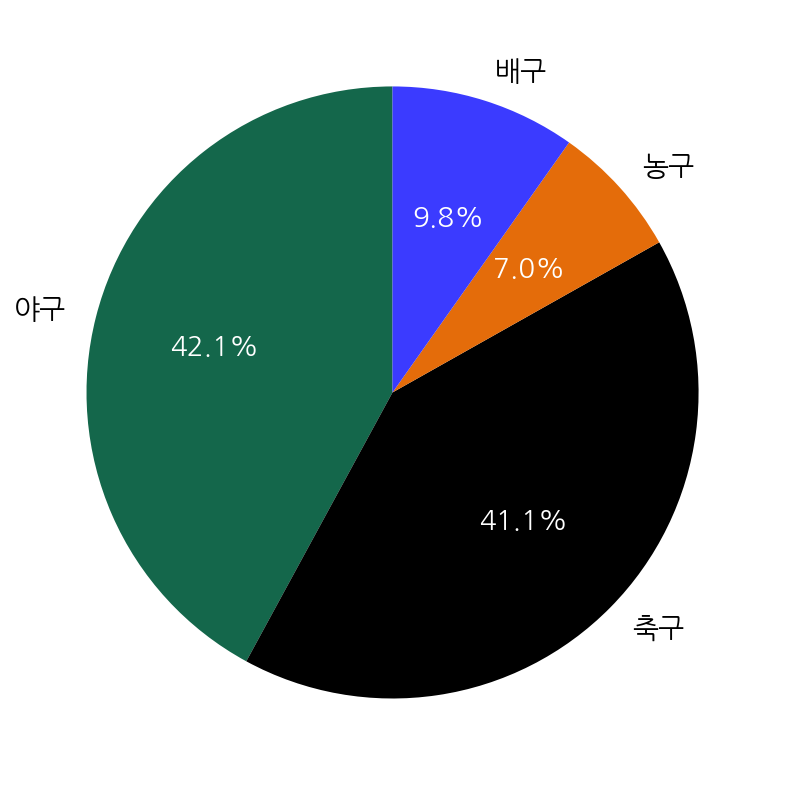

In [ ]:
# 종목별 전체 선호도 합계 계산
total_sport_preference =month_sport[['야구', '축구', '농구', '배구']].sum()

# 파이차트 그리기
labels = ['야구', '축구', '농구', '배구']
colors = ['#14674b', '#000000', '#E46C0A', '#3B3BFF']

fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_alpha(0)  # 배경 투명 설정
ax.set_facecolor('white')  # 축 배경 투명 설정

# 파이차트 생성
def format_autopct(pct):
    return f'{pct:.1f}%'  # 비율 표기를 블랙으로 설정

ax.pie(
    total_sport_preference,
    labels=labels,
    autopct=lambda pct: format_autopct(pct),  # 비율 표기
    startangle=90,
    colors=colors,
    textprops={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}  # 종목명 흰색 + 볼드 처리
)

# 비율 텍스트 블랙 설정
for text in ax.texts:
    if '%' in text.get_text():  # 비율 텍스트만 블랙으로 설정
        text.set_color('white')
        text.set_fontweight('bold')

plt.tight_layout()
plt.show()# 종목별 전체 선호도 합계 계산


### 분석내용: 종목별 전체 선호도 합계
1. 전체 선호도 합계 비율 결과
 - 야구: 42.1%,
 - 축구: 41.1%
 - 농구: 9.8%
 - 배구: 7.0%
2. 결론
 - 야구과 축구의 선호도 전체 선호도 비율이 비슷하여, 선호하는 타겟층이 동일할 가능성이 높음.
 - 농구와 배구의 9.8%, 7.0%로 선호도 비율이 비슷하지만, 야구와 축구보다 현저히 떨어짐.


### 4.2  2023 - 2024 종목별 월 평균 관중수

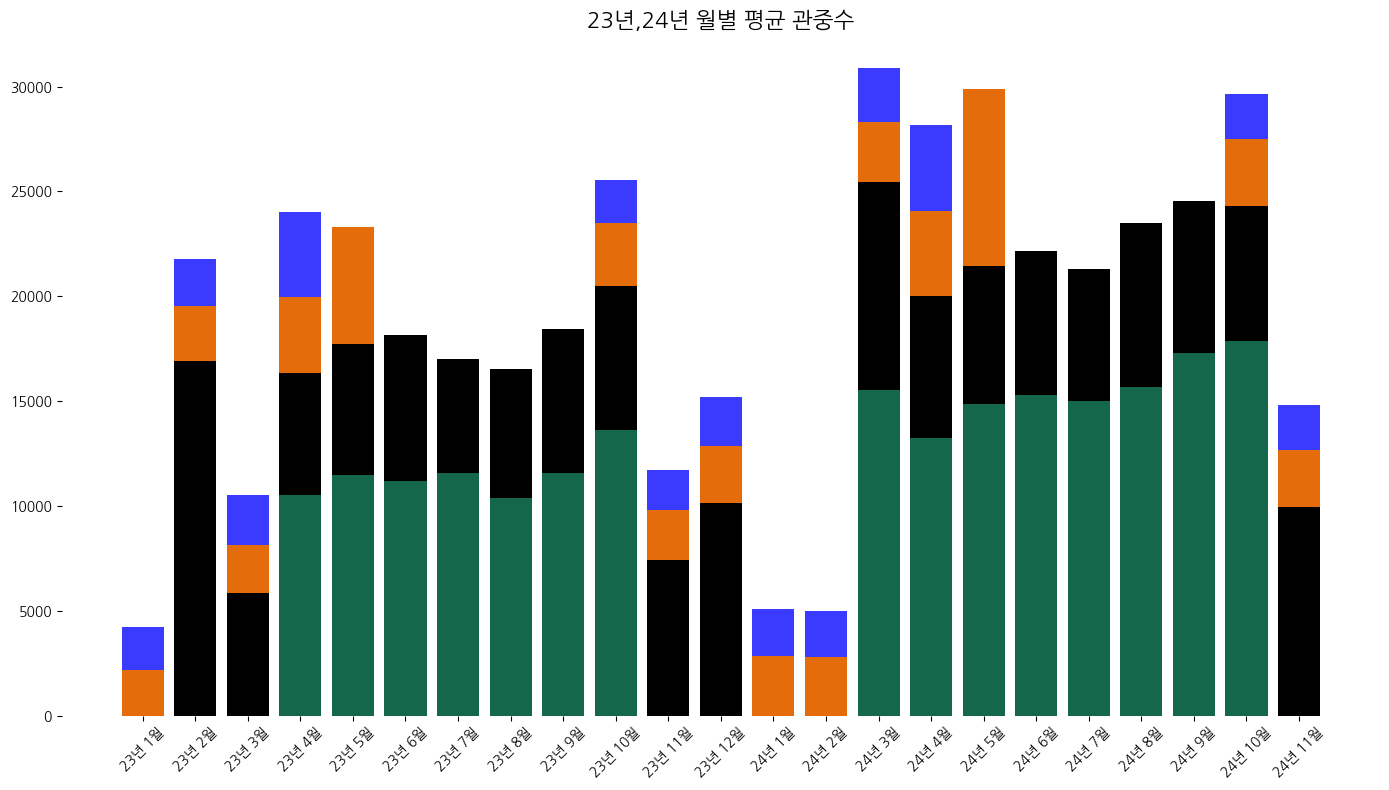

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# '년도'와 '월'을 결합하여 '년도월' 열 생성 (YYYYMM 형식)
address['년도월'] = (
    address['년도'].astype(str) + '-' + address['월'].astype(str).str.zfill(2)
)

# '년도월'과 '종목'으로 그룹화하여 평균 관중수 계산
monthly_avg_audience = address.groupby(['년도월', '종목'])['관중수'].mean().unstack()

# 경기 수 계산: '년도월'과 '종목'으로 그룹화하여 각 종목의 경기 수 계산
monthly_game_count = address.groupby(['년도월', '종목']).size().unstack()

# 원하는 순서대로 종목 정렬 (평균 관중수와 경기 수 모두 동일한 순서)
monthly_avg_audience = monthly_avg_audience[['야구', '축구', '농구', '배구']]

# Assuming `monthly_avg_audience` is the dataframe provided by the user
# Fill missing data (NaN) with zeros for proper stacking
filtered_avg_audience = monthly_avg_audience.loc['2023-01':].fillna(0)

# Define colors and labels
labels = ['야구', '축구', '농구', '배구']
colors = ['#14674b', '#000000', '#E46C0A', '#3B3BFF']
color_map = dict(zip(labels, colors))

# Function to format x-axis labels
def format_xticks(index_labels):
    formatted_labels = []
    for label in index_labels:
        year, month = label.split('-')
        formatted_labels.append(f"{year[-2:]}년 {int(month)}월")  # "23년 1월" 형식으로 변환
    return formatted_labels

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot settings
bar_width = 0.8
x = range(len(filtered_avg_audience.index))

# Initialize the bottom for stacking
bottom = [0] * len(filtered_avg_audience.index)

# Plot stacked bars
for sport in filtered_avg_audience.columns:
    ax1.bar(
        x,
        filtered_avg_audience[sport],
        bar_width,
        bottom=bottom,  # Stacking starts from the bottom
        color=color_map.get(sport, '#999999'),  # Fallback color
        label=sport
    )
    bottom = [bottom[j] + filtered_avg_audience[sport].iloc[j] for j in range(len(bottom))]  # Update bottom values

# Add a title and x-axis labels
ax1.set_title('23년,24년 월별 평균 관중수', fontsize=16)

# Format and set x-axis ticks
formatted_labels = format_xticks(filtered_avg_audience.index)
ax1.set_xticks(x)
ax1.set_xticklabels(formatted_labels, rotation=45)

# Remove chart borders
for spine in ax1.spines.values():
    spine.set_visible(False)

# Add legend
ax1.legend(loc='upper left', fontsize=10)
ax1.legend().remove()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### 분석내용: 2023 - 2024 종목별 월 평균 관중수  
## 월 평균 관중수

| 스포츠 | 2023년 | 2024년 | 증감률 |
|--------|--------|--------|--------|
| 야구   | 66.8만 | 89.9만 | +34.6% |
| 축구   | 25.1만 | 28.4만 | +12.9% |
| 농구   | 9.4만  | 11.6만  | +23.3%|
| 배구   | 8.0만  | 8.3만  | +4.6%  |

- 2023년, 2024년 종목별 월 평균 관중수의 증감률 비교 결과, 야구는 34.6%, 축구는 12.9%, 농구는 23.3%, 배구는 4.6%로 전반적으로 전 종목의 관중이 증가.
-  23년 대비 24년 하반기 전체 관중 증가 추세 → 스포츠 관심도 상승 가능성 높음.
- 전반적으로 관중이 많아지는 경향을 보이는 것은 시즌 후반부 경기 중요성과 연관되어 있음.
-  야외 스포츠(야구·축구)는 봄·가을에 관중 증가, 실내 스포츠(농구·배구)는 겨울철에 관중 증가로 계절·이벤트별 맞춤형 마케팅 전략 필요


### 4.3 종목별 관중수와 검색량 추이
  - 목적: 종목별 관중수와 검색량의 상관관계가 있는지 확인
  - 활용 데이터: 23~24년 월별 관중수와 검색량
  - 시각화: 관중수 - 바 그래프 / 검색량 - 선 그래프 = 관중수와 검색량이 비슷한 추이를 보이는 지 표시

- 데이터 정규화

In [ ]:
# Prepare 관중수 데이터
address['날짜'] = pd.to_datetime(
    address[['년도', '월', '일']].rename(columns={'년도': 'year', '월': 'month', '일': 'day'})
)
address['년도월'] = address['날짜'].dt.to_period('M')
audience_monthly = address.groupby(['종목', '년도월'])['관중수'].sum().reset_index()

# Prepare 검색량 데이터
search_volume_long = search.melt(
    id_vars='날짜',
    value_vars=['KBO', 'K리그', 'KBL', 'KOVO'],
    var_name='종목',
    value_name='검색량'
)
mapping = {'KBO': '야구', 'K리그': '축구', 'KBL': '농구', 'KOVO': '배구'}
search_volume_long['종목'] = search_volume_long['종목'].map(mapping)
search_volume_long['날짜'] = pd.to_datetime(search_volume_long['날짜'])
search_volume_long['년도월'] = search_volume_long['날짜'].dt.to_period('M')
search_volume_monthly = search_volume_long.groupby(['종목', '년도월'])['검색량'].mean().reset_index()

# Merge datasets on 종목 and 년도월
merged_monthly_data = pd.merge(audience_monthly, search_volume_monthly, on=['종목', '년도월'], how='inner')
merged_monthly_data


,종목,년도월,관중수,검색량
0,농구,2022-10,74120,14.940853
1,농구,2022-11,87574,18.457856
2,농구,2022-12,115950,24.291260
3,농구,2023-01,102509,20.739601
4,농구,2023-02,99318,16.415495
...,...,...,...,...
75,축구,2024-07,389361,27.577245
76,축구,2024-08,320552,21.593405
77,축구,2024-09,354471,23.313149
78,축구,2024-10,269720,19.723476


- 정규성 검증

In [ ]:
from scipy.stats import shapiro  # shapiro 함수 가져오기
# Perform Shapiro-Wilk test for normality on 관중수 and 검색량 for each sport
normality_results_by_sport = {}

for sport in merged_monthly_data['종목'].unique():
    sport_data = merged_monthly_data[merged_monthly_data['종목'] == sport]

    # Shapiro-Wilk 테스트 수행
    audience_normality = shapiro(sport_data['관중수'])
    search_volume_normality = shapiro(sport_data['검색량'])

    # p-value만 저장
    normality_results_by_sport[sport] = {
        "관중수 p-value": audience_normality.pvalue,
        "검색량 p-value": search_volume_normality.pvalue,
    }

# 결과를 DataFrame으로 변환
p_values_df = pd.DataFrame(normality_results_by_sport).T  # Transpose for better readability

# Display p-values DataFrame
p_values_df

,관중수 p-value,검색량 p-value
농구,0.799704,0.888641
배구,0.013369,0.163551
야구,0.242290,0.477083
축구,0.181062,0.208446


- p-value = 0.05미만이므로 비모수 검증
- 스피어만 상관관계 분석

In [ ]:
from scipy.stats import spearmanr  # pearsonr 대신 spearmanr import

# Initialize a dictionary to store Spearman correlation results
spearman_correlation_results = {}

# Perform Spearman correlation for each sport
for sport in merged_monthly_data['종목'].unique():
    sport_data = merged_monthly_data[merged_monthly_data['종목'] == sport]

    # 스피어만 상관 분석
    correlation, p_value = spearmanr(sport_data['관중수'], sport_data['검색량'])

    # 결과 저장
    spearman_correlation_results[sport] = {
        "Correlation Coefficient": correlation,
        "p-value": p_value,
    }

# 결과를 데이터프레임으로 변환
df_1 = pd.DataFrame(spearman_correlation_results)

# 결과 출력
print("스피어만 상관분석 결과:")
print(df_1)

# 보기 좋게 형식화된 결과를 원한다면:
df_formatted = df_1.round(3)  # 소수점 3자리까지 반올림
print("\n형식화된 결과:")
print(df_formatted)


스피어만 상관분석 결과:
                               농구        배구            야구            축구
Correlation Coefficient  0.841073  0.611765  9.750000e-01  9.435484e-01
p-value                  0.000012  0.011788  7.143706e-10  1.881320e-15

형식화된 결과:
                            농구     배구     야구     축구
Correlation Coefficient  0.841  0.612  0.975  0.944
p-value                  0.000  0.012  0.000  0.000


- 분석 시각화
- 관중수 - 바 그래프
- 검색량 - 선 그래프

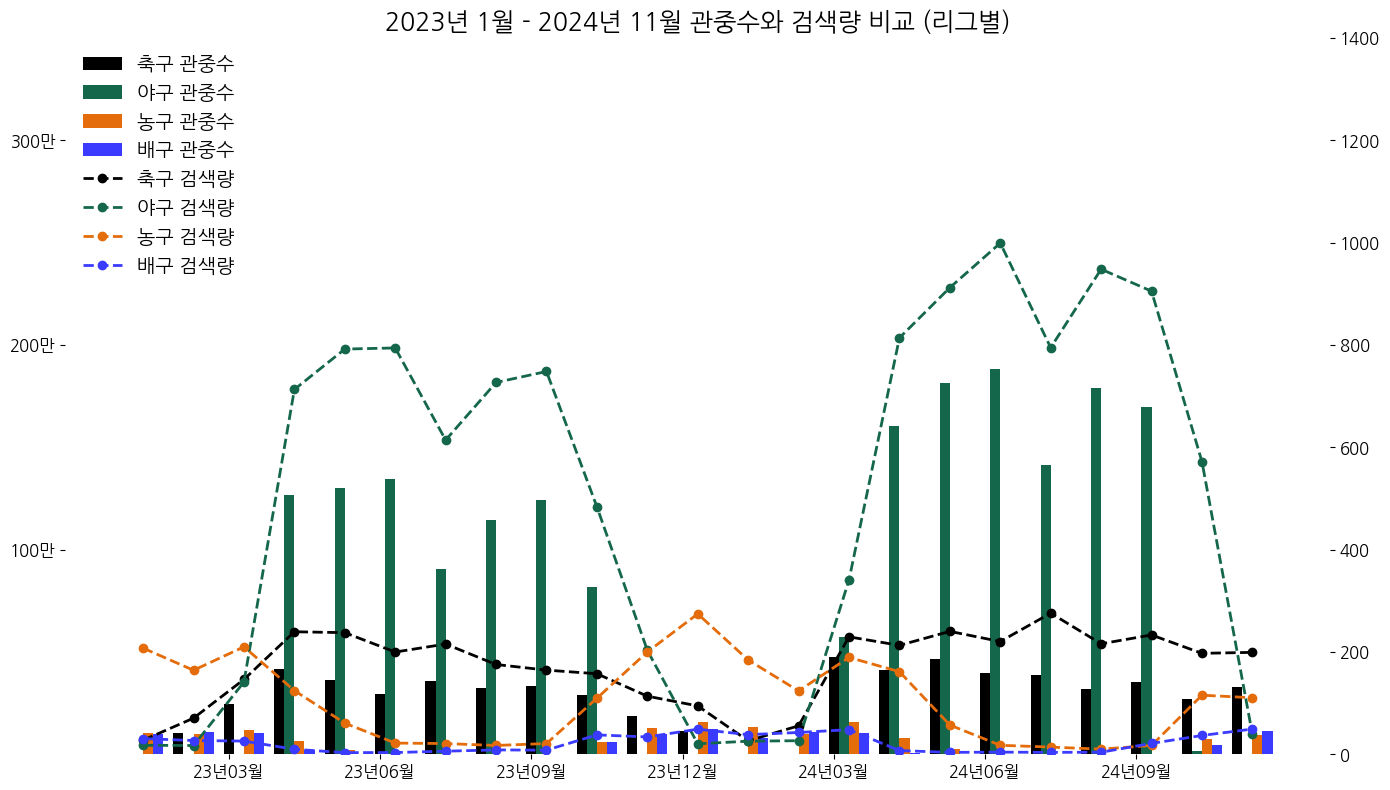

In [ ]:

# Colors for each sport
colors = {"야구": "#14674b", "축구": "#000000", "농구": "#E46C0A", "배구": "#3B3BFF"}

# 날짜 데이터 전처리
search['년도월'] = pd.to_datetime(search['날짜']).dt.to_period('M').dt.to_timestamp()
search_data = search[(search['년도월'] >= '2023-01') & (search['년도월'] <= '2024-11')]
search_data = search_data.rename(columns={
    'K리그': '축구',
    'KBO': '야구',
    'KBL': '농구',
    'KOVO': '배구'
})
FM_month = search_data.groupby('년도월')[['축구', '야구', '농구', '배구']].sum()
FM_month = FM_month.rename(columns=lambda x: f'{x}_검색량')

# 관중수 데이터 전처리
address['년도월'] = pd.to_datetime(
    address['년도'].astype(str) + '-' + address['월'].astype(str),
    format='%Y-%m'
)
audience_data = address[(address['년도월'] >= '2023-01') & (address['년도월'] <= '2024-11')]
audience_monthly = audience_data.groupby(['년도월', '종목'])['관중수'].sum().unstack(fill_value=0)
audience_monthly = audience_monthly.rename(columns=lambda x: f'{x}_관중수')

# 데이터 병합
merged_data = pd.merge(FM_month, audience_monthly, left_index=True, right_index=True, how='outer').fillna(0)


# 상관계수 정의
correlation_coefficients = {
    '축구': 0.94,
    '야구': 0.87,
    '농구': 0.85,
    '배구': 0.74
}

# x축을 분기별 (3, 6, 9, 12월)로 설정하도록 수정
fig, ax1 = plt.subplots(figsize=(14, 8))

# 관중수 막대 그래프
bar_width = 0.2
x = np.arange(len(merged_data.index))
for idx, sport in enumerate(['축구', '야구', '농구', '배구']):
    column_name = f'{sport}_관중수'
    if column_name in merged_data.columns:
        ax1.bar(x + idx * bar_width, merged_data[column_name], width=bar_width, label=f'{sport} 관중수', color=colors[sport])

# x축 설정: 3월, 6월, 9월, 12월만 선택
selected_months = merged_data.index[merged_data.index.month.isin([3, 6, 9, 12])]
x_selected = [i for i, date in enumerate(merged_data.index) if date.month in [3, 6, 9, 12]]
ax1.set_xticks(x_selected)
ax1.set_xticklabels([f"{date.strftime('%y년%m월')}" for date in selected_months], fontsize=12, rotation=0, fontweight='bold')

# y축 설정 (관중수)
ax1.set_ylim(0, 3500000)  # y축 최대값 설정 (관중수)
ax1.set_yticks([1000000, 2000000, 3000000])
ax1.set_yticklabels(['100만', '200만', '300만'], fontsize=12)

# 테두리 제거
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# 검색량 꺾은선 그래프 (보조 y축 사용)
ax2 = ax1.twinx()
for sport in ['축구', '야구', '농구', '배구']:
    column_name = f'{sport}_검색량'
    if column_name in merged_data.columns:
        ax2.plot(x + bar_width * 1.5, merged_data[column_name], label=f'{sport} 검색량', color=colors[sport], marker='o', linestyle='--', linewidth=2)

# y축 설정 (검색량)
ax2.set_ylim(0, 1400)  # y축 최대값 설정 (검색량)
ax2.tick_params(axis='y', labelsize=12)

# 테두리 제거
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# 범례
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14, loc='upper left', frameon=False)

# # 상관계수 추가 (텍스트 왼쪽으로 이동)
# y_text_positions = [3300000, 3100000, 2900000, 2700000]  # 텍스트 y축 위치 분산
# for idx, (sport, y_position) in enumerate(zip(['축구', '야구', '농구', '배구'], y_text_positions)):
#     if sport in correlation_coefficients:
#         ax1.text(
#             x[-1] - 2.5,  # 텍스트 위치 (x축 왼쪽으로 이동)
#             y_position,  # 텍스트 위치 (y축)
#             f'{sport}: 상관계수 - {correlation_coefficients[sport]:.2f}',
#             fontsize=16,
#             fontweight='bold',
#             color=colors[sport]
#         )

# 제목 및 레이아웃
plt.title('2023년 1월 - 2024년 11월 관중수와 검색량 비교 (리그별)', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### 분석 내용: 검색량과 관중수의 상관관계

1. **검색량과 관중수 추이**:
   - 2023년 1월부터 2024년 11월까지의 데이터에서 검색량과 관중수는 유사한 패턴을 보임.
   - 검색량이 증가할 때 관중수도 함께 증가하는 경향을 확인.

2. 상관계수 해석

- 야구 (0.975): 가장 강한 양의 상관관계
- 축구 (0.944): 두 번째로 강한 양의 상관관계 > 매우 강한 양의 상관관계, 검색량과 관중수가 매우 밀접하게 연관
- 농구 (0.841): 강한 양의 상관관계, 상당히 높은 상관관계, 검색량 증가가 관중수 증가와 강하게 연관
- 배구 (0.612): 중간 정도의 양의 상관관계, 다른 종목들에 비해 상대적으로 낮은 상관관계 그래도 의미있는 양의 상관관계 존재

3. p-value 해석 : 모든 종목이 p < 0.05로 통계적으로 유의함
농구, 야구, 축구: p < 0.001 (매우 강한 유의성)
배구: p = 0.012 (유의한 수준)

4. **결론**:
   - 검색량은 관중수의 변화를 예측할 수 있는 주요 지표로 활용 가능.
   - 향후 마케팅 전략 수립 시 검색량 데이터를 활용하여 관중 유입을 극대화하는 방안을 고려해야 함.


## 4.4 Z세대 남성, 여성 선호 스포츠 추이
  - 목적: Z세대의 선호도 추이
  - 활용 데이터: 23-24년 선호도 조사 데이터
  - 시각화 : x축은 기간, y축은 종목별 가중치를 합산한 점수를 활용해 성별에 따른 스포츠 선호도 추이 표시

- 남성 추이

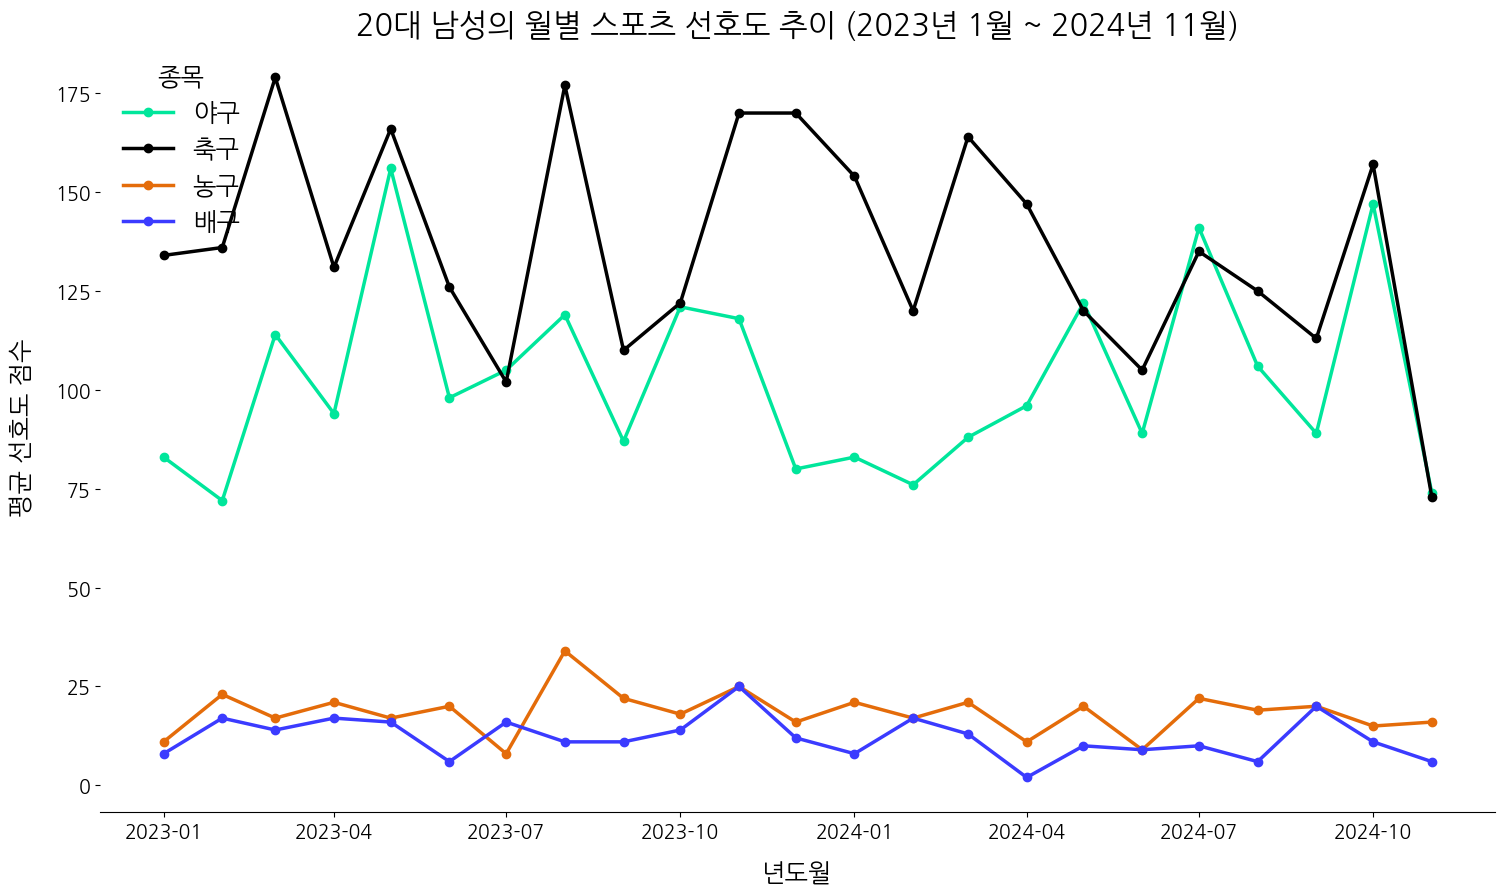

In [ ]:
# 연령대별, 성별별 스포츠 종목 합계 계산
sports = ['야구', '축구', '농구', '배구']

# '년도월' 열을 datetime 형식으로 변환
month_sport['년도월'] = pd.to_datetime(
    month_sport['년도'].astype(str) + '-' + month_sport['월'].astype(str).str.zfill(2)
)

# 2023년 1월부터 2024년 11월까지의 데이터를 필터링
filtered_data_extended = month_sport[
    (month_sport['년도월'] >= '2023-01-01') & (month_sport['년도월'] <= '2024-11-30') &
    (month_sport['연령'].isin([20])) & (month_sport['성별'] == 'M')
]

# '년도월' 기준으로 그룹화하여 각 스포츠별 평균 선호도 계산
grouped_data_extended = filtered_data_extended.groupby('년도월')[sports].sum()

# 스포츠별 색상 설정
colors = {
    '축구': '#000000',
    '야구': '#00e69b',
    '농구': '#E46C0A',
    '배구': '#3B3BFF'
}

# 그래프 그리기
plt.figure(figsize=(18, 10))
for sport in sports:
    plt.plot(grouped_data_extended.index, grouped_data_extended[sport],
             label=sport, color=colors[sport], marker='o', linewidth=2.5)

# 그래프 스타일
plt.title('20대 남성의 월별 스포츠 선호도 추이 (2023년 1월 ~ 2024년 11월)',
          fontsize=22, fontweight='bold')
plt.xlabel('년도월', fontsize=18, fontweight='bold', labelpad=15)
plt.ylabel('평균 선호도 점수', fontsize=18, fontweight='bold', labelpad=15)
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# 범례 추가 (배경 제거)
plt.legend(title='종목', fontsize=18, title_fontsize=18, frameon=False)

# 테두리 제거
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(False)

# 그래프 출력
plt.show()

- 축구 선호도는 굳건히 유지되고 야구 또한 꾸준한 인기를 유지함
- 배구보다는 농구의 선호도가 높은걸 볼 수 있음


- 여성 추이

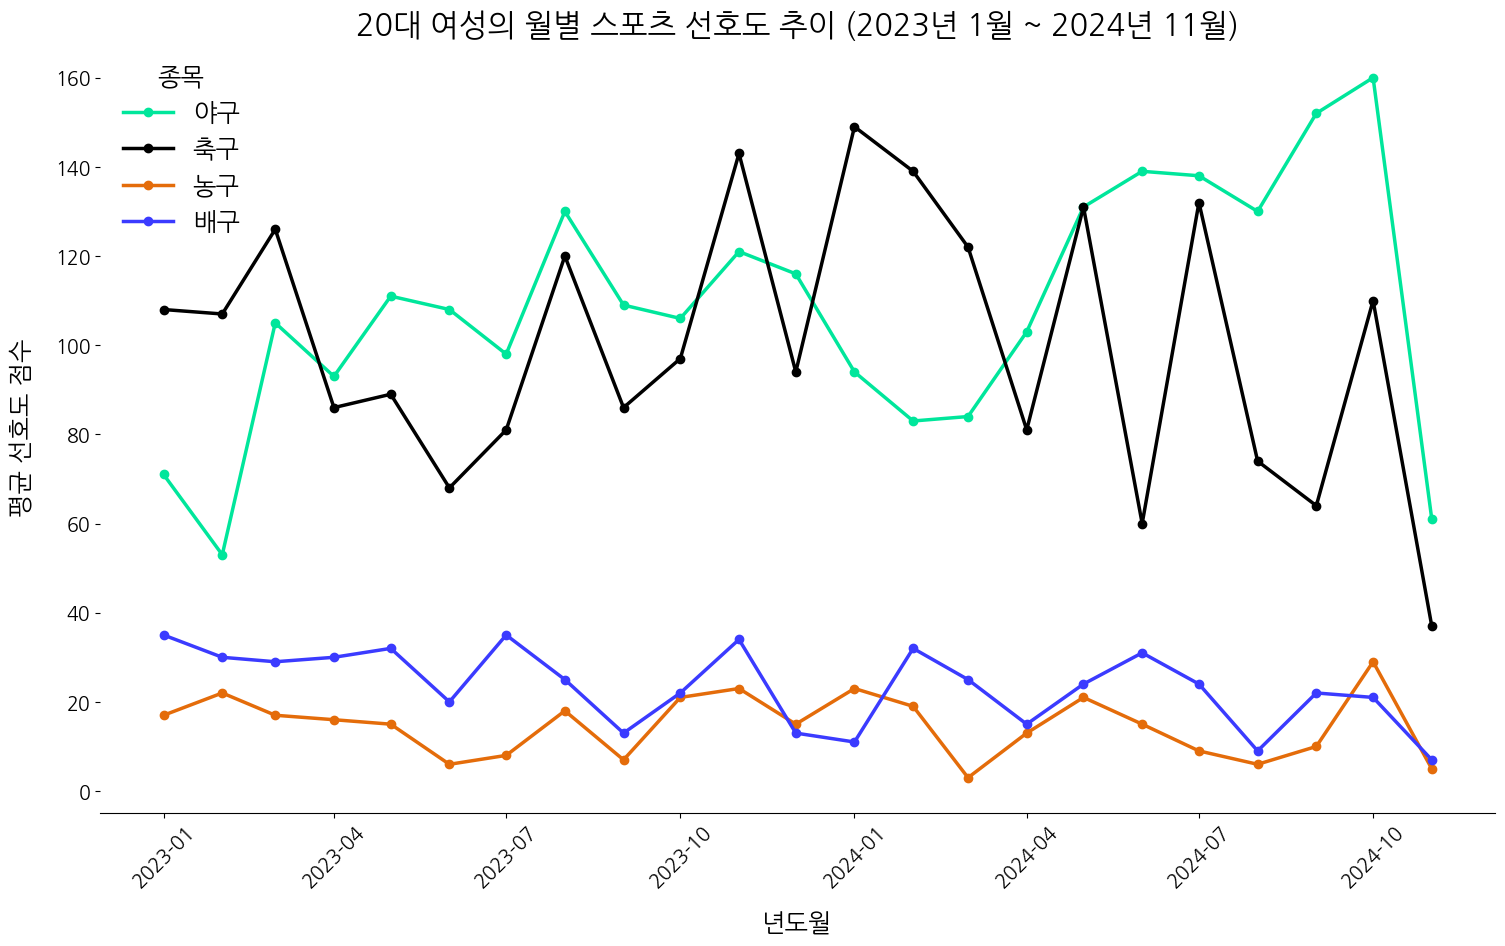

In [ ]:
# '년도월' 열을 datetime 형식으로 변환
month_sport['년도월'] = pd.to_datetime(
    month_sport['년도'].astype(str) + '-' + month_sport['월'].astype(str).str.zfill(2)
)

# 2023년 1월부터 2024년 11월까지의 데이터를 필터링
filtered_data_extended = month_sport[
    (month_sport['년도월'] >= '2023-01-01') & (month_sport['년도월'] <= '2024-11-30') &
    (month_sport['연령'].isin([20])) & (month_sport['성별'] == 'F')
]

# '년도월' 기준으로 그룹화하여 각 스포츠별 평균 선호도 계산
grouped_data_extended = filtered_data_extended.groupby('년도월')[sports].sum()

# 스포츠별 색상 설정
colors = {
    '축구': '#000000',
    '야구': '#00e69b',
    '농구': '#E46C0A',
    '배구': '#3B3BFF'
}

# 그래프 그리기
plt.figure(figsize=(18, 10))
for sport in sports:
    plt.plot(grouped_data_extended.index, grouped_data_extended[sport],
             label=sport, color=colors[sport], marker='o', linewidth=2.5)

# 그래프 스타일
plt.title('20대 여성의 월별 스포츠 선호도 추이 (2023년 1월 ~ 2024년 11월)',
          fontsize=22, fontweight='bold')
plt.xlabel('년도월', fontsize=18, fontweight='bold', labelpad=15)
plt.ylabel('평균 선호도 점수', fontsize=18, fontweight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# 범례 추가 (배경 제거)
plt.legend(title='종목', fontsize=18, title_fontsize=18, frameon=False)

# 테두리 제거
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(False)

# 그래프 출력
plt.show()

- 야구 선호도가 상승하는 추이를 보임
- 남성과 비교했을때 배구 선호도에서 우위를 보임

# 5. 가설 검증 및 분석 시각화

### 5.1 Z세대 남성은 농구, 여성은 배구를 선호한다.

- 귀무가설: Z세대 성별에 따라 농구와 배구의 선호도 차이가 없다
- 대립가설: Z세대 성별에 따라 농구와 배구의 선호도 차이가 있다.


In [ ]:

# 20대 데이터만 필터링
selected_data = month_sport[month_sport['연령'] == 20][['성별', '농구', '배구']].dropna()

# 정규성 검증 결과 저장
normality_results = []

# 성별로 그룹화하여 정규성 검증 (Shapiro-Wilk 테스트)
for gender, group in selected_data.groupby('성별'):
    for sport in ['농구', '배구']:
        stat, p_value = shapiro(group[sport])
        normality_results.append({
            '성별': gender,
            '종목': sport,
            'Shapiro-Wilk': stat,
            'p-value': p_value
        })

# 결과를 데이터프레임으로 정리
normality_df = pd.DataFrame(normality_results)

# 정규성 검증 결과 출력
normality_df

,성별,종목,Shapiro-Wilk,p-value
0,F,농구,0.591330,5.489279e-35
1,F,배구,0.640589,2.448373e-33
2,M,농구,0.594488,8.220002e-35
3,M,배구,0.510329,2.657933e-37


- p-value = 0.05 미만
- 따라서 MANN-WHITNEY U-TEST (비모수 검정) 진행 - 두 독립적인 집단 간에 차이가 있는지를 비교할 때 사용

In [ ]:
from scipy.stats import mannwhitneyu
# 결측치 제거
selected_data = selected_data.dropna(subset=['농구', '배구'])

# 그룹별 데이터 분리
male_group = selected_data[selected_data['성별'] == 'M']
female_group = selected_data[selected_data['성별'] == 'F']

# Mann-Whitney U-test for 농구
stat, p_value = mannwhitneyu(male_group['농구'], female_group['농구'], alternative='two-sided')
print("농구 선호도 차이 검정:")
print(f"U-statistic: {stat}, p-value: {p_value}")

# Mann-Whitney U-test for 배구
stat, p_value = mannwhitneyu(male_group['배구'], female_group['배구'], alternative='two-sided')
print("배구 선호도 차이 검정:")
print(f"U-statistic: {stat}, p-value: {p_value}")

농구 선호도 차이 검정:
U-statistic: 188045.0, p-value: 0.0023479099300410975
배구 선호도 차이 검정:
U-statistic: 144412.5, p-value: 1.1225901868715635e-08


In [ ]:
# 평균 계산
# 두 종목들의 선호도 차이가 있다는 건 알지만 어느정도의 차이가 있는지 확인이 필요하여
# 각 선호도의 평균을 나타낸 코드드
print("남성 농구 평균:", male_group['농구'].mean())
print("여성 농구 평균:", female_group['농구'].mean())
print("남성 배구 평균:", male_group['배구'].mean())
print("여성 배구 평균:", female_group['배구'].mean())

남성 농구 평균: 1.2589437819420783
여성 농구 평균: 0.8406779661016949
남성 배구 평균: 0.8551959114139693
여성 배구 평균: 1.8338983050847457


- 농구와 배구 성별 간 선호도 차이는 통계적으로 유의미하게 나타남
- 여성의 선호도 응답 분포가 더 넓어 개인별 차이가 크다는 것을 시사

<ipython-input-113-52ca1439e666>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
<ipython-input-113-52ca1439e666>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-113-52ca1439e666>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["여성", "남성"])
<ipython-input-113-52ca1439e666>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
<ipython-input-113-52ca1439e666>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-113-52ca1439e666>:40: 

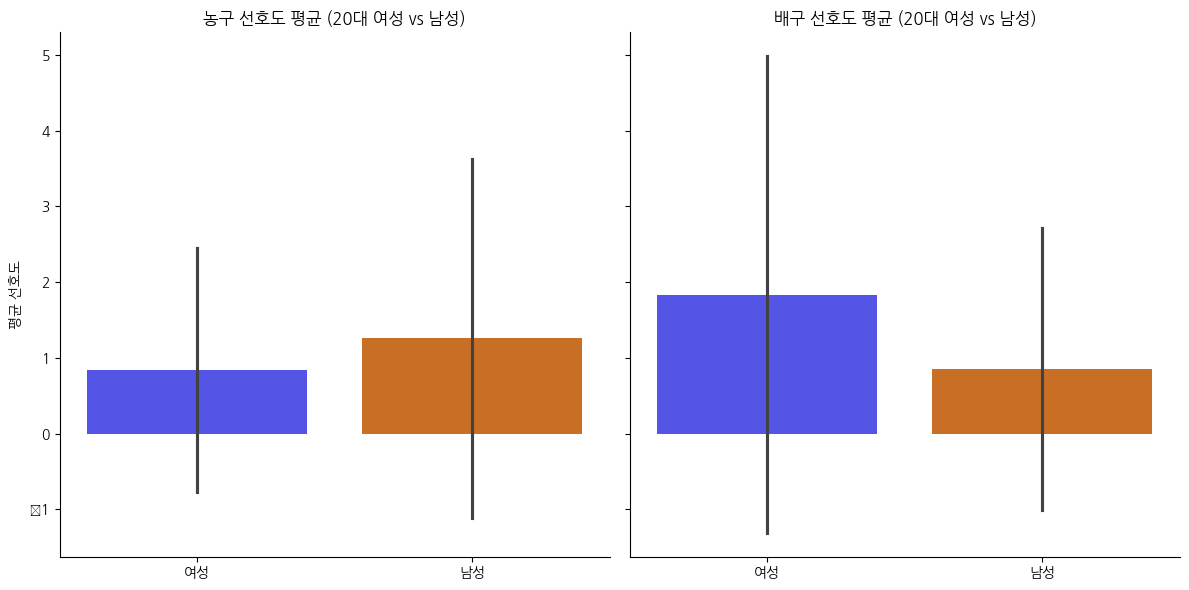

In [ ]:
# 사용자 정의 색상 설정
colors = [ '#3B3BFF','#E46C0A']

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# 농구 선호도 바 플롯
sns.barplot(
    data=selected_data,
    x='성별',
    y='농구',
    ci="sd",
    palette=colors,
    ax=axes[0]
)
axes[0].set_title("농구 선호도 평균 (20대 여성 vs 남성)")
axes[0].set_ylabel("평균 선호도")
axes[0].set_xlabel("")

# 성별 이름 변경
axes[0].set_xticklabels(["여성", "남성"])

# 박스 테두리 제거 (axes[0])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)


# 배구 선호도 바 플롯
sns.barplot(
    data=selected_data,
    x='성별',
    y='배구',
    ci="sd",
    palette=colors,
    ax=axes[1]
)
axes[1].set_title("배구 선호도 평균 (20대 여성 vs 남성)")
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_xticklabels(["여성", "남성"])

# 박스 테두리 제거 (axes[1])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)


# 전체 그래프 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

### 5.1 연령대별  성별간에 스포츠 선호도에 차이가 있다.

- 귀무가설: 연령대별 성별간에 스포츠 선호도 차이가 없다.
- 대립가설: 연령대별 성별간에 스포츠 선호도 차이가 있다.

<ipython-input-106-422ebd48ddba>:62: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


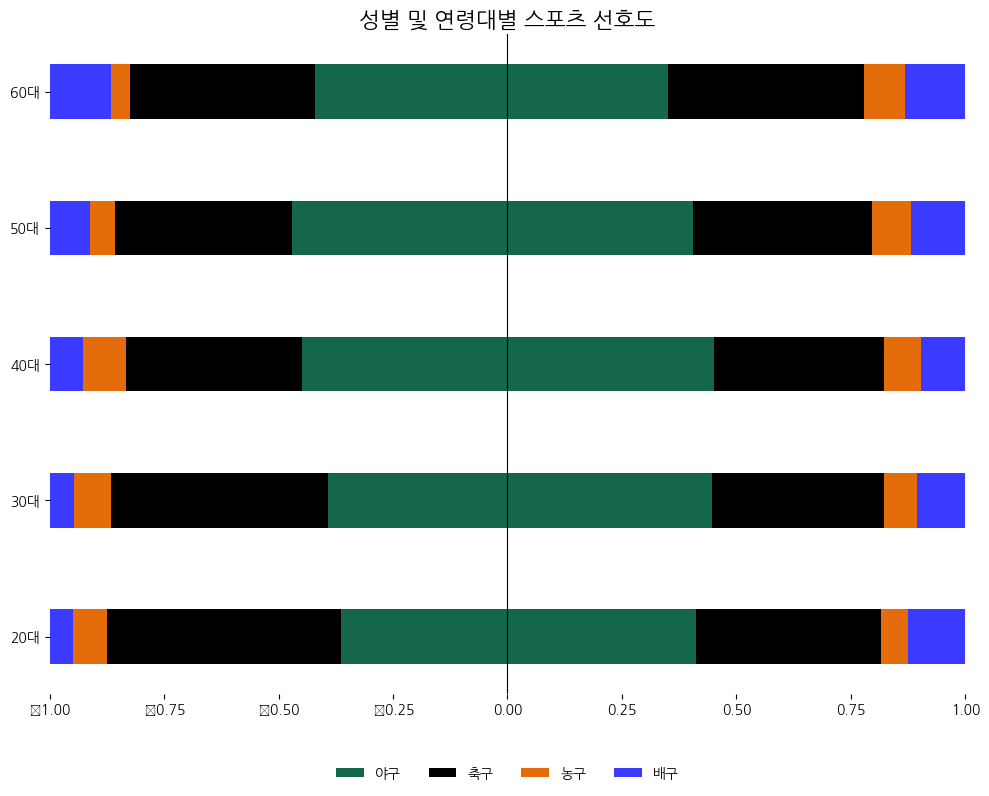

In [ ]:
# month_sport 데이터가 준비되지 않은 경우, 실제 데이터를 로드하거나 생성해야 합니다.

# 연령대를 10단위로 그룹화하여 새로운 열 추가
month_sport['연령대'] = (month_sport['연령'] // 10 * 10).astype(str) + '대'

# 연령대별, 성별별 스포츠 종목 합계 계산
sports = ['야구', '축구', '농구', '배구']
grouped_data = month_sport.groupby(['성별', '연령대'])[sports].sum().reset_index()

# 연령대 정렬
age_labels = sorted(grouped_data['연령대'].unique(), key=lambda x: int(x[:-1]))

# 남성과 여성 데이터 추출 및 비율 계산
male_data = grouped_data[grouped_data['성별'] == 'M'].set_index('연령대')[sports].reindex(age_labels).fillna(0)
female_data = grouped_data[grouped_data['성별'] == 'F'].set_index('연령대')[sports].reindex(age_labels).fillna(0)

# 비율 계산
male_data_percentage = male_data.div(male_data.sum(axis=1), axis=0)
female_data_percentage = female_data.div(female_data.sum(axis=1), axis=0)

# 색상 설정
colors = {'야구': '#14674b', '축구': '#000000', '농구': '#E46C0A', '배구': '#3B3BFF'}

# 그래프 초기화
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')

# 데이터 누적 저장 변수 초기화
male_bottom = [0] * len(age_labels)
female_bottom = [0] * len(age_labels)

# 각 스포츠 종목에 대해 누적 막대 그래프 추가
for sport in sports:
    # 남성 데이터
    male_totals = -male_data_percentage[sport].fillna(0).astype(float)
    bars_male = ax.barh(range(len(age_labels)), male_totals, 0.4, color=colors[sport], label=f'{sport}', left=male_bottom)
    male_bottom = [m + t for m, t in zip(male_bottom, male_totals)]

    # 여성 데이터
    female_totals = female_data_percentage[sport].fillna(0).astype(float)
    bars_female = ax.barh(range(len(age_labels)), female_totals, 0.4, color=colors[sport], left=female_bottom)
    female_bottom = [f + t for f, t in zip(female_bottom, female_totals)]



# 스타일 설정
ax.set_title('성별 및 연령대별 스포츠 선호도', fontsize=16, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)

# 범례 추가
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10, frameon=False)

# 축 범위 설정
ax.set_xlim(-1, 1)
ax.set_yticks(range(len(age_labels)))
ax.set_yticklabels(age_labels)

# 테두리 제거
for spine in ax.spines.values():
    spine.set_visible(False)

# 저장 및 출력
plt.tight_layout()
plt.show()

- 왼쪽이 남성 오른쪽이 여성

* 축구는 청년 문화
  - 20-30대 남성층이 압도적

* 야구는 중년 문화에서 세대 확장 중
  - 40-50대 남녀 주도, 20-30대 여성 관심도 증가

* 농구는 틈새 세대 스포츠
  - 30-40대에서 8-9% 중반대로 완만한 분포

* 배구는 시니어와 여성 팬층을 연결
  - 60대 남녀 모두 높은 선호, 20-30대 여성 특정 팬층의
높은 지지


### 지역에 따라 관중수와 선호하는 종목 간에는 유의미한 상관관계가 존재한다

In [ ]:
# Preprocess audience_data: Group by region and sport, summing up audience counts
audience_region = address.groupby(['지역', '종목'])['관중수'].sum().unstack(fill_value=0)

# Preprocess preference_data: Group by region and sport, summing up preference scores
preference_region = month_sport.groupby('지역')[['농구', '배구', '야구', '축구']].sum()

# Merge the two datasets on regions
merged_region_data = pd.merge(preference_region, audience_region, left_index=True, right_index=True, suffixes=('_선호도', '_관중수'))

# Perform Shapiro-Wilk test for normality on 선호도 and 관중수 for each sport
normality_results = {}

for sport in ['농구', '배구', '야구', '축구']:
    for column in [f'{sport}_선호도', f'{sport}_관중수']:
        if column in merged_region_data.columns:
            test_stat, p_value = shapiro(merged_region_data[column])
            normality_results[column] = {
                'Test Statistic': test_stat,
                'p-value': p_value
            }

# Convert results to a DataFrame for better visualization
normality_results_df = pd.DataFrame.from_dict(normality_results, orient='index')

# Display the results
normality_results_df

,Test Statistic,p-value
농구_선호도,0.676135,0.000093
농구_관중수,0.754698,0.000724
배구_선호도,0.692485,0.000140
배구_관중수,0.745539,0.000562
야구_선호도,0.724678,0.000320
야구_관중수,0.713148,0.000236
축구_선호도,0.645133,0.000045
축구_관중수,0.845222,0.011597


- p값이 전부 0.05 미만이므로 비모수 검증 진행
- 스피어만 상관관계 분석 진행

In [ ]:
# Perform Spearman correlation for each sport
spearman_correlation_results = {}

for sport in ['농구', '배구', '야구', '축구']:
    # Check if both 선호도 and 관중수 columns exist for the sport
    if f'{sport}_선호도' in merged_region_data.columns and f'{sport}_관중수' in merged_region_data.columns:
        correlation, p_value = spearmanr(
            merged_region_data[f'{sport}_선호도'],
            merged_region_data[f'{sport}_관중수']
        )
        spearman_correlation_results[sport] = {
            'spearmanr_corr': correlation,
            'p-value': p_value
        }

# Convert results to a DataFrame for better visualization
spearman_correlation_df = pd.DataFrame.from_dict(spearman_correlation_results, orient='index')

# Display the results
spearman_correlation_df

,spearmanr_corr,p-value
농구,0.735137,0.001176
배구,0.593106,0.015451
야구,0.810536,0.000140
축구,0.367647,0.161232


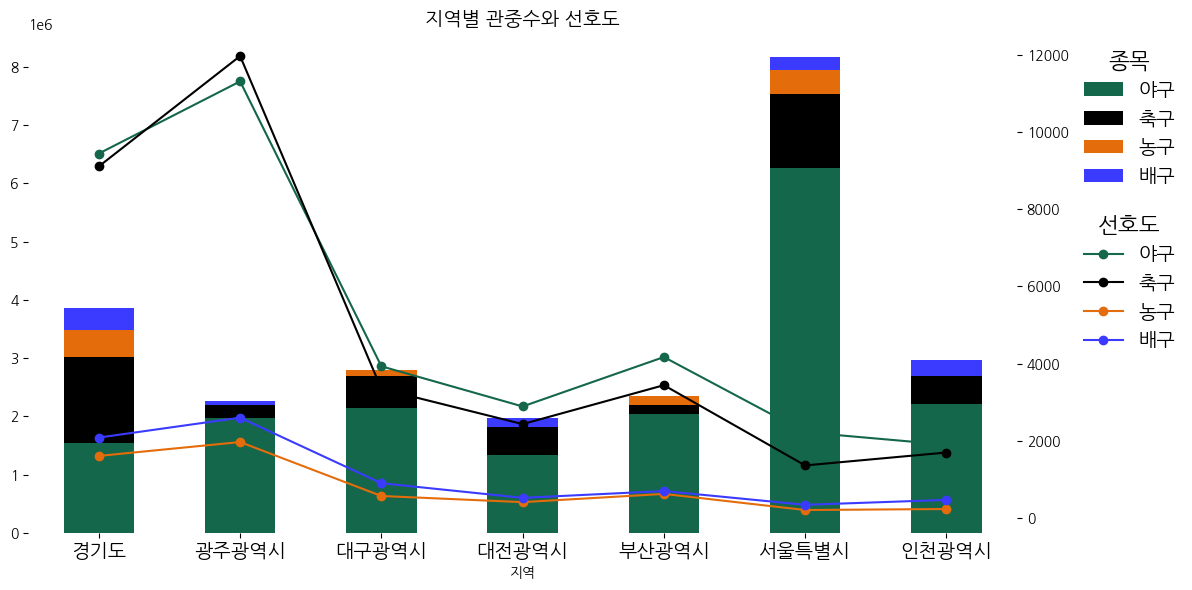

In [ ]:
# Summarize attendance data by region and select the top 7 regions
top_regions = (
    address.groupby("지역")["관중수"]
    .sum()
    .sort_values(ascending=False)
    .head(7)
    .index
)

# Filter attendance and preference data for the top 7 regions
filtered_attendance = address.loc[address["지역"].isin(top_regions)]
filtered_preference = month_sport.loc[month_sport["지역"].isin(top_regions)]

# Aggregate attendance data by region and sport
attendance_summary = (
    filtered_attendance.groupby(["지역", "종목"])["관중수"]
    .sum()
    .unstack(fill_value=0)
)
# Reorder columns to 야구, 축구, 농구, 배구
attendance_summary = attendance_summary[["야구", "축구", "농구", "배구"]]

# Aggregate preference data by region and sport
preference_summary = (
    filtered_preference.groupby("지역")[["야구", "축구", "농구", "배구"]]
    .sum()
    .loc[top_regions]
)
preference_summary


# Colors for each sport
colors = ["#14674b", "#000000", "#E46C0A", "#3B3BFF"]

# Create the cumulative bar and line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot cumulative bar chart for attendance
attendance_summary.plot(kind="bar", stacked=True, color=colors, ax=ax1)
ax1.set_title("지역별 관중수와 선호도", fontsize=14)

# Update legend for attendance
ax1.legend(
    title="종목",
    fontsize=14,  # Increase legend font size
    title_fontsize=16,  # Increase title font size
    frameon=False,  # Remove legend box background
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

# Set x-axis labels horizontally
ax1.tick_params(axis='x', labelrotation=0, labelsize=14)

# Remove borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Create a secondary y-axis for preference data
ax2 = ax1.twinx()

# Plot line chart for preference
for i, sport in enumerate(["야구", "축구", "농구", "배구"]):
    ax2.plot(
        preference_summary.index,
        preference_summary[sport],
        marker="o",
        label=sport,
        color=colors[i],
    )



# Update legend for preference
ax2.legend(
    title="선호도",
    fontsize=14,  # Increase legend font size
    title_fontsize=16,  # Increase title font size
    frameon=False,  # Remove legend box background
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
)

# Remove borders for secondary axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.xticks(rotation=0)  # Ensure x-labels are horizontal
plt.tight_layout()
plt.show()

### 분석 내용: 지역별 관중수와 선호 종목

1. **지역별 관중수**
   - **서울특별시**와 **경기도**는 가장 높은 관중수를 기록, 특히 야구와 축구에서 두드러짐.
   - **대구광역시**와 **부산광역시**는 야구 관중수가 압도적으로 많음.


2. **종목별 선호도**
   - **야구**: 모든 지역에서 가장 인기 있는 종목.
   - **축구**: 서울과 경기 지역에서 높은 선호도.
   - **농구/배구**: 관중수는 낮지만 특정 지역에서 관심 확인.

3. **마케팅 시사점**
   - **야구**: 전국적 이벤트 및 구장 내 경험 강화.
   - **축구**: 서울·경기 중심 대규모 프로모션.
   - **농구/배구**: 타겟층 세분화 및 팬층 확대 전략 필요.


## 6. 머신러닝

### 6.1 개요
연령대별 스포츠 검색률과 선호도 간의 높은 상관관계를 확인한 결과, 연령대별 스포츠 선호도를 예측하기 위한 데이터 분석을 진행하게 되었습니다.

이를 위해 **두 가지** 접근 방식을 설정했습니다:

**경기장별 관중 수 예측**

관중 수가 스포츠 선호도와 검색률에 직결된다고 판단하여 경기장별 관중 수 데이터를 분석하고, 이를 토대로 향후 관중 수 변화를 예측합니다.

**종목별 온라인 검색량 예측**

종목별 온라인 검색량 데이터를 기반으로 향후 검색 트렌드를 예측합니다.

해당 예측을 위해 채택한 데이터는 **'22년 - 24년 종목별 검색률 데이터'**, **'21년-24년 4개종목 경기장별 관중수 데이터'**입니다.

### 6.2 알고리즘 선택 과정

경기장별 관중 수 데이터 및 종목별 온라인 검색량 데이터는 모두 연속형 결과치가 필요하여 **회귀 알고리즘**과 **시계열 알고리즘**을 선택하게 되었습니다.


### 6.3 계획 및 모델 선정

**1. 경기장별 관중 수 예측 모델**

경기장별 관중 수 예측은 **스포츠 선호도 및 검색량의 상관관계 분석 결과**를 기반으로 진행되었습니다.
예측을 위해 독립변수와 종속변수를 구분해야 했기에, **시계열 알고리즘이 아닌 회귀 알고리즘**을 적용하였습니다.

다양한 모델을 실험한 결과,

**선형 데이터에 특화된 모델**: Linear Regression, MLP Regressor
**비선형 데이터에 특화된 모델**: Random Forest, XGBoost
그중 비선형 모델의 성능이 우수하게 나타났으며, 평가 결과 **Random Forest 회귀** 모델이 가장 높은 예측 성능을 보여 최종 모델로 선정하였습니다.

**2. 종목별 온라인 검색량 예측 (출처: 네이버 데이터 랩)**

종목별 검색량이 많을수록 **온라인 마케팅 전략**을 강화할 수 있다는 점에 착안하여, **2025년 검색량을 예측**하였습니다.
검색량 데이터는 일자별로 세분화되어 있어 **시계열 알고리즘**을 적용하였으며,

데이터 양이 적을 때 최적화된 모델: **ARIMA**
스포츠의 **시즌별 패턴 반영**이 가능한 모델: **SARIMA**
두 가지 모델을 활용하여 **종목별 검색량 변화**를 예측하였습니다.

### 한글 폰트 적용

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 모델 및 검증 패키지 로드

In [ ]:
import sklearn # 머신러닝 사이킷런
import pandas as pd # 판다스
import numpy as np # 넘파이
import pickle # 전처리 방식 저장용

In [ ]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt # 시계열용 시각화
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
# 모델 전처리 과정 (훈련용 데이터, 테스트용 데이터)
from sklearn.model_selection import train_test_split # 훈련, 테스트용 데이터 분리
from sklearn.preprocessing import LabelEncoder, StandardScaler # 인코딩 및 스케일링
from sklearn.model_selection import KFold # 타깃 인코딩용

In [ ]:
# 회귀 모델 패키지 로드
# 선형 회귀에 특화
from sklearn.linear_model import LinearRegression # 일반 선형회귀
from sklearn.neural_network import MLPRegressor # MLP 선형회귀
# 비선형 회귀에 특화
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트
from xgboost import XGBRegressor # XGBoost
# 회귀모델 검증용
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# 하이퍼파라미터 튜닝 진행
from sklearn.model_selection import GridSearchCV

### 파일 로드 및 기본 전처리

In [ ]:
df = pd.read_csv('관중수+검색률병합_지역_관중수_비율_점수.csv')
df.columns = ['location', 'audience_count', 'month','day', 'sport', 'region', 'day_of_week', 'search_rate','a','b' ,'preference_score'] # 열 이름 재지정
df = df[['location', 'month', 'day','search_rate','preference_score' , 'audience_count']] # 사용 할 열 추출
grouped_df = df

## **경기장별 관중 수 예측**

### 6.4 모델 데이터 전처리


In [ ]:
# 경기장 인코딩
# 각 열마다 인코딩 과정이 다릅니다.

# 1. 경기장(location) : 타깃 인코딩
# 각 location에 대해 관중수(audience_count)의 평균값을 대표 값으로 사용

grouped_df['location_encoded'] = 0
# K-Fold 교차 검증(KFold Cross-Validation) 설정
# - n_splits=5: 데이터를 5개로 나눕니다.
# - shuffle=True: 데이터를 무작위로 섞어 더 일반화된 결과를 얻도록 합니다.
# - random_state=42: 재현성을 위해 난수 생성의 시드를 고정합니다.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, valid_idx in kf.split(grouped_df):
  # train_idx: 훈련 데이터의 인덱스
  # valid_idx: 검증 데이터의 인덱스

  # 훈련 데이터와 검증 데이터 나눔
  train_data, valid_data = grouped_df.iloc[train_idx], grouped_df.iloc[valid_idx]
  # location별로 audience_count의 평균값을 계산합니다.
  # 예: location='A'의 평균 관중수 = train_data에서 location='A'인 값들의 평균
  target_mean = train_data.groupby('location')['audience_count'].mean()

  # 검증 데이터의 location 값을 평균값으로 매핑
  # valid_data의 location 값을 target_mean에서 찾아 변환
  grouped_df.loc[valid_idx, 'location_encoded'] = grouped_df.loc[valid_idx, 'location'].map(target_mean)

# 결측값이 발생할 경우 전체 관중수의 평균값으로 대체
grouped_df['location_encoded'] = grouped_df['location_encoded'].fillna(grouped_df['audience_count'].mean())

# 기존 'location' 열을 삭제하고'location_encoded'를 사용
grouped_df = grouped_df.drop(columns=['location'])

<ipython-input-7-8668c558a056>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7665.65306122 9491.56818182 9491.56818182 ... 2347.83018868 1937.21276596
 1888.32352941]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped_df.loc[valid_idx, 'location_encoded'] = grouped_df.loc[valid_idx, 'location'].map(target_mean)


In [ ]:
# 2. '월' 데이터 인코딩 : 범주형 변수 원-핫 인코딩
categorical_cols = ['month']
grouped_df = pd.get_dummies(grouped_df, columns=categorical_cols)

In [ ]:
# 3. 검색률, 선호도 성능을 높이기 위한 스케일링 : 연속형 변수 스케일링 (표준화)

scaler = StandardScaler()
numerical_cols = ['search_rate', 'preference_score']
grouped_df[numerical_cols] = scaler.fit_transform(grouped_df[numerical_cols])

In [ ]:
# 필요 없는 열 및 순서 정리
grouped_df = grouped_df[['audience_count','search_rate', 'preference_score', 'location_encoded', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12','day']]

In [ ]:
X = grouped_df.drop(columns=['audience_count'])  # 독립 변수 (관중수 뺀 모든 열 독립변수 지정)
y = grouped_df['audience_count']  # 종속 변수 (관중수)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6.5 모델 학습 및 평가

#### 선형 / 비선형 회귀 정확도 비교

In [ ]:
# 파라미터 조정 전 원형 모델 학습 및 예측 (선형/비선형 회귀 정확도 비교)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500)
}

# 각 모델 학습 및 평가
for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test) #훈련용 데이터로 label 예측

    # 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # 결과 출력
    print(f"{name} - RMSE: {round(np.sqrt(mse),2)}, R²: {r2:.4f}")

Linear Regression - RMSE: 3248.91, R²: 0.7422
Random Forest - RMSE: 2892.38, R²: 0.7957
XGBoost - RMSE: 2977.3, R²: 0.7835
MLP Regressor - RMSE: 3405.0, R²: 0.7168


Linear Regression, MLP Regressor : 선형 데이터에 특화된 모델들 <br>
Random Forest, XGBoost : 비선형 데이터에 특화된 모델들 <br>
-  네 종류의 모델 중 비선형 데이터 특화인
RFR, XGR의 성능값이 우수하게 도출되었음.

- **RFR, XGR 둘 중 RFR의 성능값이 더 우수하게 도출 되어 해당 알고리즘 채택**

#### 랜덤포레스트 회귀 하이퍼파라미터 튜닝 진행

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # 회귀모델
from sklearn.model_selection import GridSearchCV
param_grid = {
      'n_estimators': [100, 200, 300],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'max_features': ['sqrt', 'log2'],  # 'auto'는 사용되지 않음
      'bootstrap': [True, False]
  }

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=43),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# 모델 훈련
grid_search.fit(X_train, y_train)

# 최적 파라미터 확인
best_params = grid_search.best_params_
print(f"최적의 파라미터:", best_params)

# 최적 파라미터를 사용한 모델 생성
model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    bootstrap=best_params['bootstrap'],
    random_state=43
)

# 모델 학습
model.fit(X_train, y_train)

# 예측 및 평가
y_pred2 = model.predict(X_test)

print('랜덤포레스트 회귀모델')
def get_clf_regre(Y_test,pred):
    print(f'R²: {round(r2_score(Y_test, pred),4)}')
    print(f'MAE: {round(mean_absolute_error(Y_test, pred),4)}')
    print(f'MSE: {round(mean_squared_error(Y_test, pred),4)}')
    print(f'RMSE: {round(np.sqrt(mean_squared_error(Y_test, pred)),4)}')
get_clf_regre(y_test,y_pred2)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
최적의 파라미터: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
랜덤포레스트 회귀모델
R²: 0.8259
MAE: 1757.0785
MSE: 7130001.3845
RMSE: 2670.2062


In [ ]:
grouped_df.columns

Index(['audience_count', 'search_rate', 'preference_score', 'location_encoded',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day'],
      dtype='object')

- 하이퍼 파라미터 조정한 결과 정확도가 더 높게 나왔기 때문에 조정한 모델 채택

In [ ]:
'''피클파일 만들기 위한 코드
각 스케일러, 모델, 타겟인코딩을 피클파일로 저장해
매번 다시 모델 학습 할 필요 없도록
그리고 학습데이터 필요 없도록.
'''
grouped_df = df
# 학습 데이터에서 타깃 평균 값 계산
location_target_mean = grouped_df.groupby('location')['audience_count'].mean()

# 파일로 저장
with open('location_target_mean.pkl', 'wb') as f:
    pickle.dump(location_target_mean, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 6.6 예측 및 결과 값

In [ ]:
# 저장된 파일 불러오기
with open('location_target_mean.pkl', 'rb') as f:
    location_target_mean = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
# 새로운 데이터 로드
new_df = pd.read_excel('test.xlsx')
new_df.columns = ['location', 'month','day','region','sport', 'search_rate', 'preference_score']
new_df = new_df.drop(columns=['region','sport'])

# 타깃 인코딩
new_df['location_encoded'] = new_df['location'].map(location_target_mean)
new_df['location_encoded'] = new_df['location_encoded'].fillna(location_target_mean.mean())
new_df = new_df.drop(columns=['location'])

# 원-핫 인코딩
new_df = pd.get_dummies(new_df, columns=['month'])
train_columns = ['search_rate', 'preference_score', 'location_encoded', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12','day']
new_df = new_df.reindex(columns=train_columns, fill_value=0)

# 스케일링(스케일은 학습데이터에서 스케일된 기준을 사용해야 합니다. fit말고 transform만)
numerical_cols = ['search_rate', 'preference_score']
new_df[numerical_cols] = scaler.transform(new_df[numerical_cols])


# 예측
y_pred = model.predict(new_df)
print(y_pred)
# 예측 결과 저장
new_df['audience_count'] = y_pred.round().astype(int)

inverse_location_target_mean = {v: k for k, v in location_target_mean.items()}
new_df['location'] = new_df['location_encoded'].map(inverse_location_target_mean)
new_df['location'] = new_df['location'].fillna('Unknown')  # 복구 불가능한 값은 'Unknown'으로 표시
new_df = new_df.drop(columns=['location_encoded'])

new_df['month'] = new_df[[f'month_{i}' for i in range(1, 13)]].idxmax(axis=1)
new_df['month'] = new_df['month'].str.extract('(\d+)').astype(int)
new_df = new_df.drop(columns=[f'month_{i}' for i in range(1, 13)])

[2282.99666667 1936.04694444 2122.78888889 ... 6144.46055556 6153.04305556
 6274.93777778]


#### 결과 파일 정리본 전처리

In [ ]:
output = new_df[['location', 'month','day','audience_count']]
output.columns = ['장소', '월','일','관중수']
output.to_excel('output.xlsx', index=False)

- 결과 출력 및 확인

In [ ]:
output[(output['월']==1)&(output['일']==24)]

,장소,월,일,관중수
23,화성종합실내체육관,1,24,1864
571,페퍼스타디움,1,24,1864
2124,천안유관순체육관,1,24,1955
2672,창원실내체육관,1,24,2096
4166,전주실내체육관,1,24,2204
4410,잠실학생체육관,1,24,2863
4989,잠실실내체육관,1,24,1570
5568,인천삼산월드체육관,1,24,4288
5781,인천계양체육관,1,24,1788
6574,의정부체육관,1,24,1788


# -------------------------------------------------------------------------------

## **종목별 온라인 검색량 예측**

#### ARIMA, ACF/PACF, ADF 테스트를 위한 패키지 로드

In [ ]:
from statsmodels.tsa.stattools import adfuller # 정상성 ADF테스트 (d값 추출)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # ARIMA의 파라미터 시각화 (p,q값 추출)
from statsmodels.tsa.arima.model import ARIMA # ARIMA 모델
from statsmodels.tsa.seasonal import seasonal_decompose # 시즌성 분해
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMA 모델

#### 파일 로드

In [ ]:
data = pd.read_csv('네이버데이터랩_22년_24년종목별_검색률_250122.csv')

### 6.4 모델 전처리

- 4개 종목을 각각 나누어 동일한 코드로 예측을 진행하였습니다.
- 가독성을 위해 현재 파일에서는 종목 중 야구에 대한 코드를 작성하겠습니다.

In [ ]:
data['날짜'] = pd.to_datetime(data['날짜'])
df_base = data[data['종목']=='야구'][['날짜','검색률']]
df_base = df_base.reset_index(drop=True)

### 6.5 데이터 형태 파악
- 정상성을 테스트한 후 차분을 진행하여 p,d,q값을 파악해야 함.

#### ADF 테스트 (정상성 테스트)

In [ ]:
# ADF 테스트
result = adfuller(df_base['검색률'])
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 0.4449740746375149


- 데이터가 정상성을 띄지 않아 차분을 1회 진행

In [ ]:
df_base['검색률_diff'] = df_base['검색률'].diff()
# 차분 진행 후 p-value 확인
result = adfuller(df_base['검색률_diff'].dropna())
print("p-value:", result[1])

p-value: 2.400316857926439e-09


- 정상성을 띄게 되어 차분 종료 (**d=1**)

### PACF / ACF 테스트 진행

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


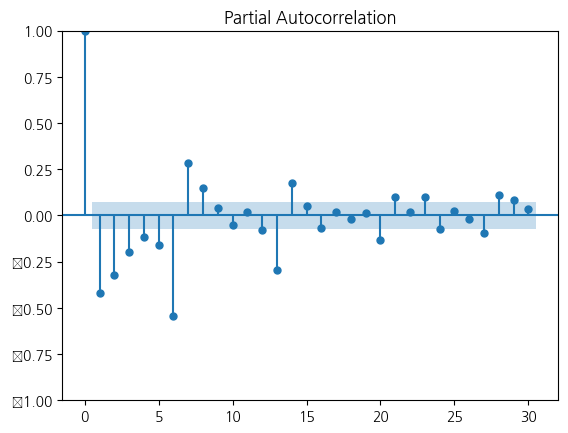

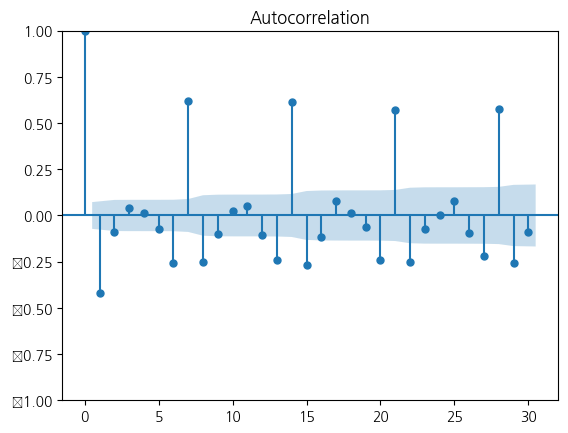

In [ ]:
plot_pacf(df_base['검색률_diff'].dropna(), lags=30)
plt.show()

plot_acf(df_base['검색률_diff'].dropna(), lags=30)
plt.show()

- **p값 : 8 / q값 : 2**

### 6.6 모델 학습 및 평가

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


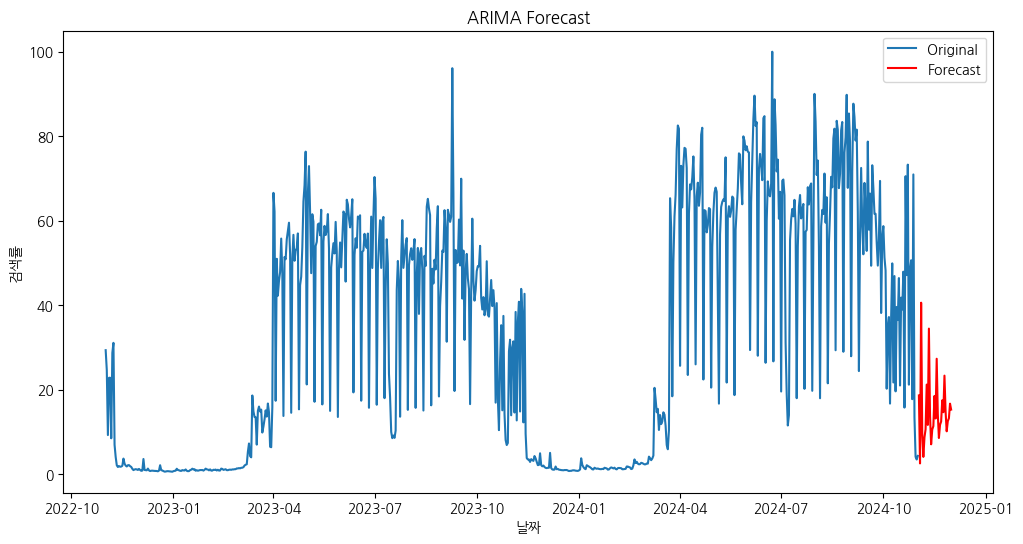

In [ ]:
# 야구
# ARIMA 모델 학습
order = (8, 1, 2)  # (p, d, q)
#                 pacf, d, acf
model = ARIMA(df_base['검색률'], order = order)
fitted_model = model.fit()

forecast_steps = 30
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df_base['날짜'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:]

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_base['날짜'], df_base['검색률'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('날짜')
plt.ylabel('검색률')
plt.legend()
plt.show()

#### 평가 수치

In [ ]:
# MAPE 계산 함수
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# MAPE 계산 (30일 예측 결과와 마지막 실제 값 비교)
# 실제 값이 존재하는지 확인하고 추출
actual = df_base['검색률'][-30:]

if len(actual) == len(forecast):
    mape = calculate_mape(actual, forecast)
else:
    mape = None  # 실제 값과 예측 값이 비교할 수 없을 경우

# MAPE 값 출력
print(f'MAPE: {mape}%')

MAPE: 80.82044636579982%


In [ ]:
# RMSE
# 실제 값 추출 (마지막 30일)
actual_values = df_base['검색률'].iloc[-forecast_steps:].values
from sklearn.metrics import mean_squared_error

# MSE 계산
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 842.99
Root Mean Squared Error: 29.03


- MAPE 값과 RMSE는 양호하지만 시각적으로 예측이 잘 반영되지 않았다.
이에 계절성으로 패턴을 파악하는 **SARIMA**로 예측 진행

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


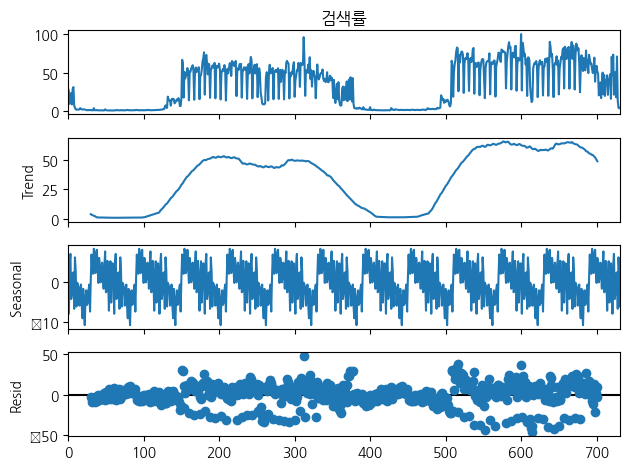

In [ ]:
# 시계열 분해
decomp = seasonal_decompose(df_base['검색률'], model='additive', period=60)
# 분해 결과 시각화
decomp.plot()
plt.show()

In [ ]:
seasonal_order = (1, 1, 1, 60)
#                 P, D, Q, s
#         계절적 자기회귀, 계절적 차분, 계절적 이동평균, 주기
# SARIMAX 모델 학습
sarima_model = SARIMAX(df_base['검색률'], order=(8, 1, 2), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


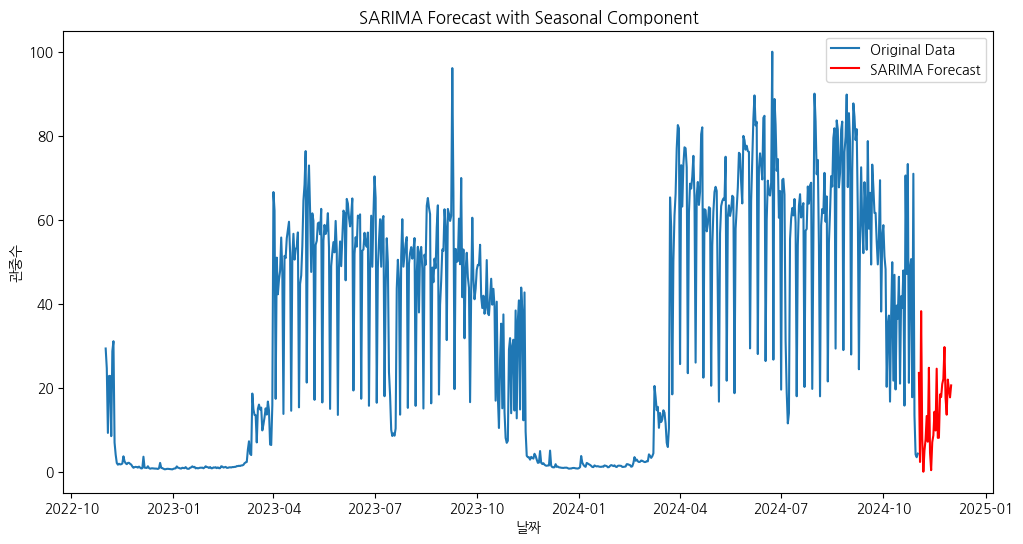

In [ ]:
step = 30
forecast_sarima = fitted_sarima_model.forecast(steps=step)
forecast_sarima = np.clip(forecast_sarima, a_min=0, a_max=None)
forecast_dates_sarima = pd.date_range(start=df_base['날짜'].iloc[-1], periods=step + 1, freq='D')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df_base['날짜'], df_base['검색률'], label='Original Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('날짜')
plt.ylabel('관중수')
plt.legend()
plt.show()

원본 데이터의 양질이 떨어지거나 검색량에 끼치는 변수의 종류가 많은 경우 검색률이 복잡해져 시계열 예측 정확도가 떨어지는 문제가 발생합니다.

해당 데이터의 경우 야구 뿐만 아니라 모든 종목의 예측도가 떨어져 **30일까지 유효하다**는 결론이 도출되었고 기존에 예측하고자 했던 분기별 검색량 추이는 결국 얻을 수 없었습니다.